## **Simulaci√≥n 3  || Vargas Nancy**
### **Estad√≠tica y Probabilidad || Comisi√≥n E**

# **¬øC√≥mo es el mercado laboral en el sector IT?**
Este trabajo integrador propone aplicar los contenidos vistos a lo largo de la materia, combinando herramientas de an√°lisis de datos, visualizaci√≥n y comunicaci√≥n estad√≠stica. El objetivo es interpretar informaci√≥n real del mercado laboral IT en Argentina, utilizando buenas pr√°cticas de presentaci√≥n de resultados, como se hace en el √°mbito profesional de la Ciencia de Datos.

Para ello, vamos a trabajar con los datos de la **Encuesta de Sueldos de Sysarmy**, una de las fuentes m√°s reconocidas dentro de la comunidad tecnol√≥gica argentina.

### **¬øQu√© es Sysarmy y qu√© datos vamos a usar?**
Desde 2014, la plataforma colaborativa [Openqube](https://sueldos.openqube.io/encuesta-sueldos-2025.01/) recopila informaci√≥n an√≥nima y voluntaria sobre condiciones laborales, salarios, tecnolog√≠as utilizadas y otros aspectos clave del mundo IT. Esta informaci√≥n se publica en el blog de Sysarmy, una comunidad de profesionales de sistemas que fomenta el intercambio de conocimiento y experiencias.
Uno de sus productos m√°s conocidos es la **encuesta de sueldos**, que permite conocer el panorama del sector IT a partir de miles de respuestas por trimestre. En esta entrega, vamos a centrarnos en los datos del **primer trimestre de 2025**, que ya est√°n disponibles en l√≠nea [ac√°](https://docs.google.com/spreadsheets/d/1hlLwv9SLJvrnsTq_UsEAHkHGNiziH7IdT1lJd4fq6kU/edit?gid=1462536742#gid=1462536742) (y tambi√©n con una copia de resguardo descargada el 5 de marzo de 2025, por si el enlace original deja de estar disponible).

### **Objetivo del trabajo**
Este desaf√≠o consiste en realizar un **an√°lisis exploratorio y estad√≠stico** de la Encuesta de sueldos IT  (Sysarmy ‚Äì 1er trimestre 2025) para conocer mejor el mercado laboral del sector tecnol√≥gico en Argentina.

**Investigar:**
* Hay **brecha salarial por g√©nero**, especialmente entre personas con nivel universitario completo?
* ¬øC√≥mo var√≠a el **salario bruto** seg√∫n el nivel educativo, el **puesto**, los **a√±os de experiencia**?
* ¬øQu√© tan conformes est√°n las personas con sus ingresos?
* ¬øCu√°les son las **carreras m√°s comunes** en el sector y c√≥mo impactan en los sueldos?

Adem√°s, se pondr√° a prueba **una conjetura estad√≠stic**a, aplicando herramientas vistas en clase como medias, comparaciones, gr√°ficos y distribuci√≥n muestral.

### **Herramientas**
Durante el desarrollo del trbajo utilizaremos herramientas del ecosistema Python para an√°lisis de datos:
* `pandas`: para la manipulaci√≥n y an√°lisis de los datasets
* `seaborn` y `matplotlib`: crear gr√°ficos estad√≠sticos como histogramas, boxplots, boxenplots, etc.
* `numpy`: para c√°lculos num√©ricos y estad√≠sticos.
* `scipy.stats`: para aplicar conceptos b√°sicos de estad√≠stica inferencial, como intervalos de confianza.

In [1]:
# Librer√≠as
import io
import pandas as pd
pd.set_option('display.max_rows', 10)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import plotly.graph_objects as go




### **Carga de datos**
Para arrancar con el an√°lisis, lo primero que tenemos que hacer es cargar los datos de la encuesta. Hay varias formas de hacerlo, pero vamos a mostrar dos que son bastante comunes:
 1. Cargar el archivo desde tu compu:

  Pod√©s descargar el archivo `2025.1-Sysarmy.csv` desde este [link](https://docs.google.com/spreadsheets/d/1hlLwv9SLJvrnsTq_UsEAHkHGNiziH7IdT1lJd4fq6kU/edit?gid=1462536742#gid=1462536742) y despu√©s subirlo a Colab con este c√≥digo:

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2025-1-Sysarmy.csv to 2025-1-Sysarmy.csv


In [3]:
df = pd.read_csv('2025-1-Sysarmy.csv')
df[0:9]

Unnamed: 0           donde_estas_trabajando dedicacion  \
0           0  Ciudad Aut√≥noma de Buenos Aires  Part-Time   
1           1  Ciudad Aut√≥noma de Buenos Aires  Full-Time   
2           2                          C√≥rdoba  Full-Time   
3           3  Ciudad Aut√≥noma de Buenos Aires  Part-Time   
4           4                          C√≥rdoba  Full-Time   
5           5  Ciudad Aut√≥noma de Buenos Aires  Full-Time   
6           6  Ciudad Aut√≥noma de Buenos Aires  Full-Time   
7           7                          C√≥rdoba  Full-Time   
8           8                     Buenos Aires  Full-Time   

                                    tipo_de_contrato  \
0                          Staff (planta permanente)   
1                                         Contractor   
2                          Staff (planta permanente)   
3                          Staff (planta permanente)   
4  Tercerizado (trabajo a trav√©s de consultora o ...   
5                          Staff (planta permanente)   
6                          Staff (planta permanente)   
7                          Staff (planta permanente)   
8                                          Freelance   

   ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos  \
0                                          6500000.0           
1                                         12700000.0           
2                                          3952805.0           
3                                          1606000.0           
4                                          1325301.0           
5                                          2670205.0           
6                                          4000000.0           
7                                          4200000.0           
8                                          3000000.0           

   ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos  \
0                                          5800000.0          
1                                         10200000.0          
2                                          3137662.0          
3                                          1360000.0          
4                                                NaN          
5                                          2167989.0          
6                                          4000000.0          
7                                          3600000.0          
8                                          2000000.0          

                                    pagos_en_dolares  \
0                 Cobro parte del salario en d√≥lares   
1                   Cobro todo el salario en d√≥lares   
2                 Cobro parte del salario en d√≥lares   
3                 Cobro parte del salario en d√≥lares   
4                 Cobro parte del salario en d√≥lares   
5                 Cobro parte del salario en d√≥lares   
6                   Cobro todo el salario en d√≥lares   
7                 Cobro parte del salario en d√≥lares   
8  Mi sueldo est√° dolarizado (pero cobro en moned...   

  si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron  \
0                                                NaN                            
1                                                NaN                            
2                                                985                            
3                                               1004                            
4                                                NaN                            
5                                                986                            
6                                                NaN                            
7                                               1070                            
8                                               1150                            

  recibis_algun_tipo_de_bono    a_que_esta_atado_el_bono  ...  \
0      De uno a tres sueldos  Performance de la compa√±√≠a  ...   
1                  Un sueldo  Perform

In [4]:
df.describe()

Unnamed: 0  ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos  \
count  5196.000000                                       5.196000e+03           
mean   2678.999615                                       2.728423e+06           
std    1537.862996                                       1.780241e+06           
min       0.000000                                       1.500000e+05           
25%    1345.750000                                       1.500000e+06           
50%    2692.500000                                       2.290000e+06           
75%    4012.250000                                       3.500000e+06           
max    5324.000000                                       1.350000e+07           

       ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos  \
count                                       4.951000e+03          
mean                                        1.072550e+10          
std                                         7.545122e+11          
min                                         4.000000e+00          
25%                                         1.288264e+06          
50%                                         1.916958e+06          
75%                                         2.893500e+06          
max                                         5.309001e+13          

       de_que_fue_el_ajuste_total_acumulado  \
count                          5.196000e+03   
mean                           1.983746e+03   
std                            1.387277e+05   
min                            0.000000e+00   
25%                            7.000000e+00   
50%                            3.500000e+01   
75%                            9.700000e+01   
max                            9.999999e+06   

       como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior  \
count                                        5196.000000                                      
mean                                            2.567552                                      
std                                             0.857654                                      
min                                             1.000000                                      
25%                                             2.000000                                      
50%                                             3.000000                                      
75%                                             3.000000                                      
max                                             4.000000                                      

       que_tan_conforme_estas_con_tus_ingresos_laborales  anos_de_experiencia  \
count                                        5196.000000          5196.000000   
mean                                            2.548691             8.747113   
std                                             0.870949             7.654972   
min                                             1.000000             0.000000   
25%                                             2.000000             3.000000   
50%                                             3.000000             6.000000   
75%                                             3.000000            13.000000   
max                                             4.000000            46.000000   

       antiguedad_en_la_empresa_actual  anos_en_el_puesto_actual  \
count                      5196.000000               5196.000000   
mean                          3.795612                  3.212471   
std                           5.008846                  6.720595   
min                           0.000000                  0.000000   
25%                           1.000000                  1.000000   
50%                           2.000000                  2.000000   
75%                           4.000000                  4.000000   
max                          90.000000                412.000000   

       cuantas_personas_tenes_a_cargo  \
count     

In [5]:
df_red = df.copy()

In [6]:
# Paleta de colores
# 'dark2', 'tab2', 'Spectral','Blues','Greens','Orange', 'Y1GNBU'
# tonos violetas claros a oscuros
violeta_palette = ['#cbc3e3', '#b19cd9', '#a18cd1', '#8e7cc3']  # tonos violetas claros a oscuros
palette = sns.color_palette("Purples", n_colors=4)
palette = sns.color_palette("coolwarm", as_cmap=False)
#sns.palplot(sns.color_palette("Set2"))
#sns.palplot(sns.color_palette("Purples", 6))

## **1. Exploraci√≥n descriptiva inicial (variables individuales)**

### **a. Representaci√≥n de la Distribuci√≥n de edades**

Realizar un an√°lisis visual de la variable `tengo_edad`, la cual refleja la edad de las personas encuestadas, con el objetivo de observar c√≥mo se distribuyen los valores y detectar posibles patrones, concentraciones o valores at√≠picos.

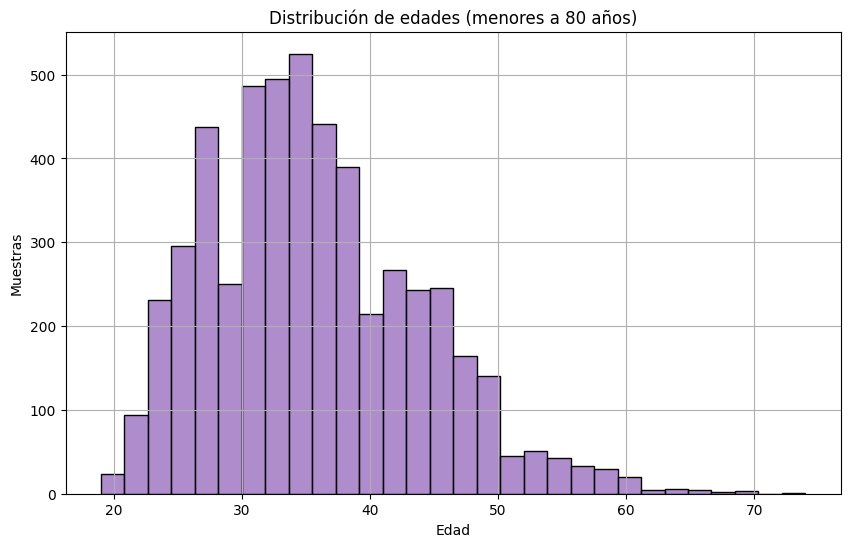

In [7]:
### Gr√°fico de distribuci√≥n de la variable edad
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df.tengo_edad < 80], x='tengo_edad', bins=30, color='#9467bd')

plt.title('Distribuci√≥n de edades (menores a 80 a√±os)')
plt.xlabel('Edad')
plt.ylabel('Muestras') #Cambiar por Muestras, cantidad
plt.grid(True)
plt.show()

La mayor√≠a de las personas encuestadas tienen entre $25$ y $45$ **a√±os**, con un pico de frecuencia alrededor de los $33$ **a√±os**. A partir de los $50$ **a√±os**, la participaci√≥n disminuye notablemente, mostrando que el sector IT relevado est√° compuesto en su mayor√≠a por personas j√≥venes y en etapa laboral activa.

### **Detecci√≥n de valores at√≠picos en la edad.**

In [8]:
# Convertimos la columna 'tengo_edad' a num√©rica, forzando errores como NaN
df['tengo_edad'] = pd.to_numeric(df['tengo_edad'], errors='coerce')

# Filtra y muestra solo las edades mayores a 80
edades_mayores_80 = df[df['tengo_edad'] > 80]['tengo_edad']
print(edades_mayores_80)


883      100
2008     227
3350    3040
3582      99
3654     354
3783    1000
4223     500
4927      90
Name: tengo_edad, dtype: int64


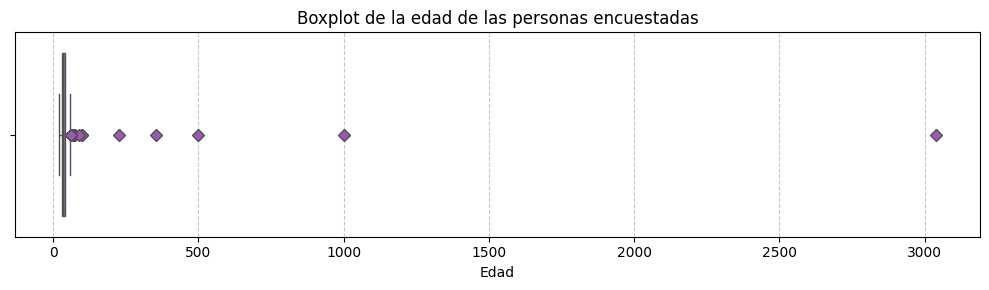

In [9]:
#Boxplot de la variable "edad"
plt.figure(figsize=(10, 3))
sns.boxplot(data=df, x='tengo_edad', color= '#9b59b6', flierprops=dict(marker='D', markerfacecolor= '#9b59b6', markersize=6))
plt.title("Boxplot de la edad de las personas encuestadas")
plt.xlabel("Edad")
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Al trabajar con datos reales, es com√∫n encontrar errores de carga. En este caso, detectamos valores en la columna edad como `100`, `227`, `354`, `500`, `1000` y `3040`, los cuales son claramente incorrectos.
Estos outliers pueden afectar negativamente el an√°lisis y la interpretaci√≥n de los resultados, por lo que es fundamental filtrarlos para asegurar una exploraci√≥n estad√≠stica confiable y representativa del mercado laboral real.

### **b. Distribuci√≥n de g√©nero**

In [10]:
# Casos de genero en la encuesta
genero_counts = df['genero'].value_counts()
genero_counts

genero
Hombre Cis           4083
Mujer Cis            1027
Prefiero no decir      44
No binarie             26
Queer                   8
Trans                   4
Lesbiana                1
Ag√©nero                 1
Name: count, dtype: int64

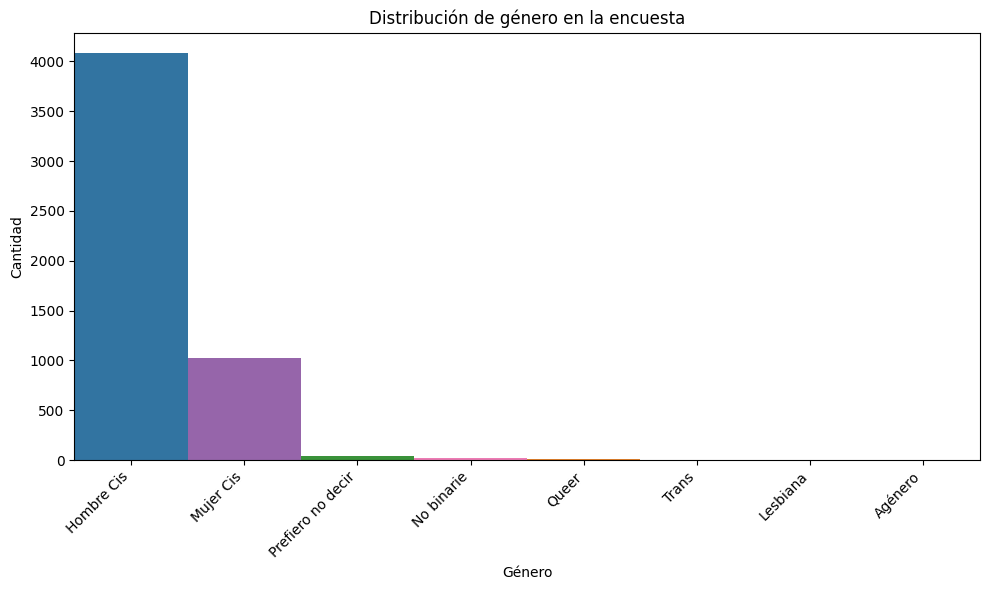

In [11]:
#Gr√°fico para ver la relaci√≥n entre los g√©neros
df_genero = genero_counts.reset_index()
df_genero.columns = ['Genero', 'Cantidad']
colores = ['#1f77b4', '#9b59b6', '#2ca02c', '#ff69b4', '#ff7f0e', '#d62728', '#9467bd', '#8c564b']

plt.figure(figsize=(10,6))
sns.barplot(data=df_genero, x='Genero', y='Cantidad', hue='Genero', palette=colores,width=1, legend=False)
plt.xlabel("G√©nero")
plt.ylabel("Cantidad")
plt.title("Distribuci√≥n de g√©nero en la encuesta")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

 La muestra presenta una marcada desigualdad de `genero`: el `68%` de las personas encuestadas se identifican como **Hombres** ($4083$ de $5968$), seguidos por **Mujeres** ($1027$), mientras que el resto de las identidades tienen una representaci√≥n mucho menor. Esta distribuci√≥n, com√∫n en el sector IT, genera un **sesgo importante** que debe tenerse en cuenta, ya que puede influir en otras variables del an√°lisis, como la brecha salarial o el acceso a oportunidades laborales.

### **c. An√°lisis del salario mensual bruto**

Una de las variables centrales en este an√°lisis es el **salario mensual bruto**, disponible en la columna `ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos`. Esta variable permite explorar la distribuci√≥n de los ingresos, identificar brechas y comparar valores entre distintos grupos, como g√©nero, antig√ºedad o nivel de conformidad.

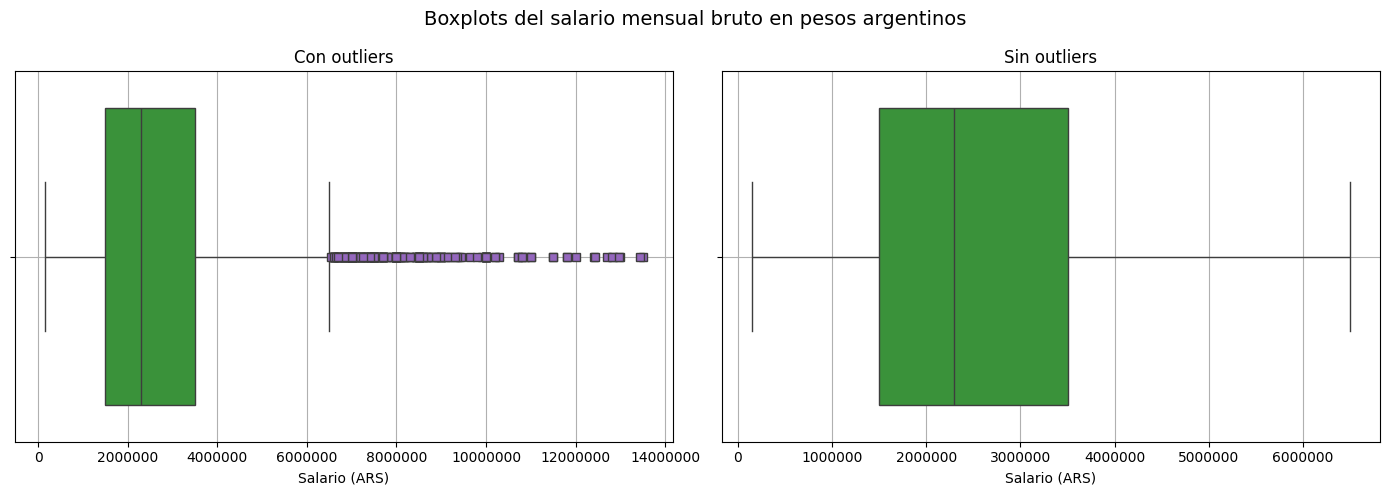

In [12]:
# Boxplots del salario mensual bruto: con y sin outliers
plt.figure(figsize=(14, 5))
# Subplot 1: Con outliers
plt.subplot(1, 2, 1)
sns.boxplot(
    x=df["ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos"],
    color='#2ca02c',
    flierprops=dict(marker='s', markerfacecolor='#9467bd', markersize=6)
)
plt.title("Con outliers")
plt.xlabel("Salario (ARS)")
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)

# Subplot 2: Sin outliers
plt.subplot(1, 2, 2)
sns.boxplot(
    x=df["ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos"],
    color='#2ca02c',
    showfliers=False
)
plt.title("Sin outliers")
plt.xlabel("Salario (ARS)")
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)

plt.suptitle("Boxplots del salario mensual bruto en pesos argentinos", fontsize=14)
plt.tight_layout()
plt.show()

Los dos boxplots del **salario mensual bruto** en pesos argentinos. El primero incluye **outliers** que distorsionan la escala, mientras que el segundo los excluye para mostrar mejor la distribuci√≥n central, asim√©trica a la derecha, con concentraci√≥n entre `$1500000` y `$3500000` pesos. La **mediana** es una medida m√°s adecuada que la **media**, al no verse afectada por los valores extremos.

> El siguiente gr√°fico se muestra la distribuci√≥n completa de los **salarios mensuales brutos**. Se destacan la **media** y la **mediana** para comparar su diferencia en una distribuci√≥n posiblemente asim√©trica.


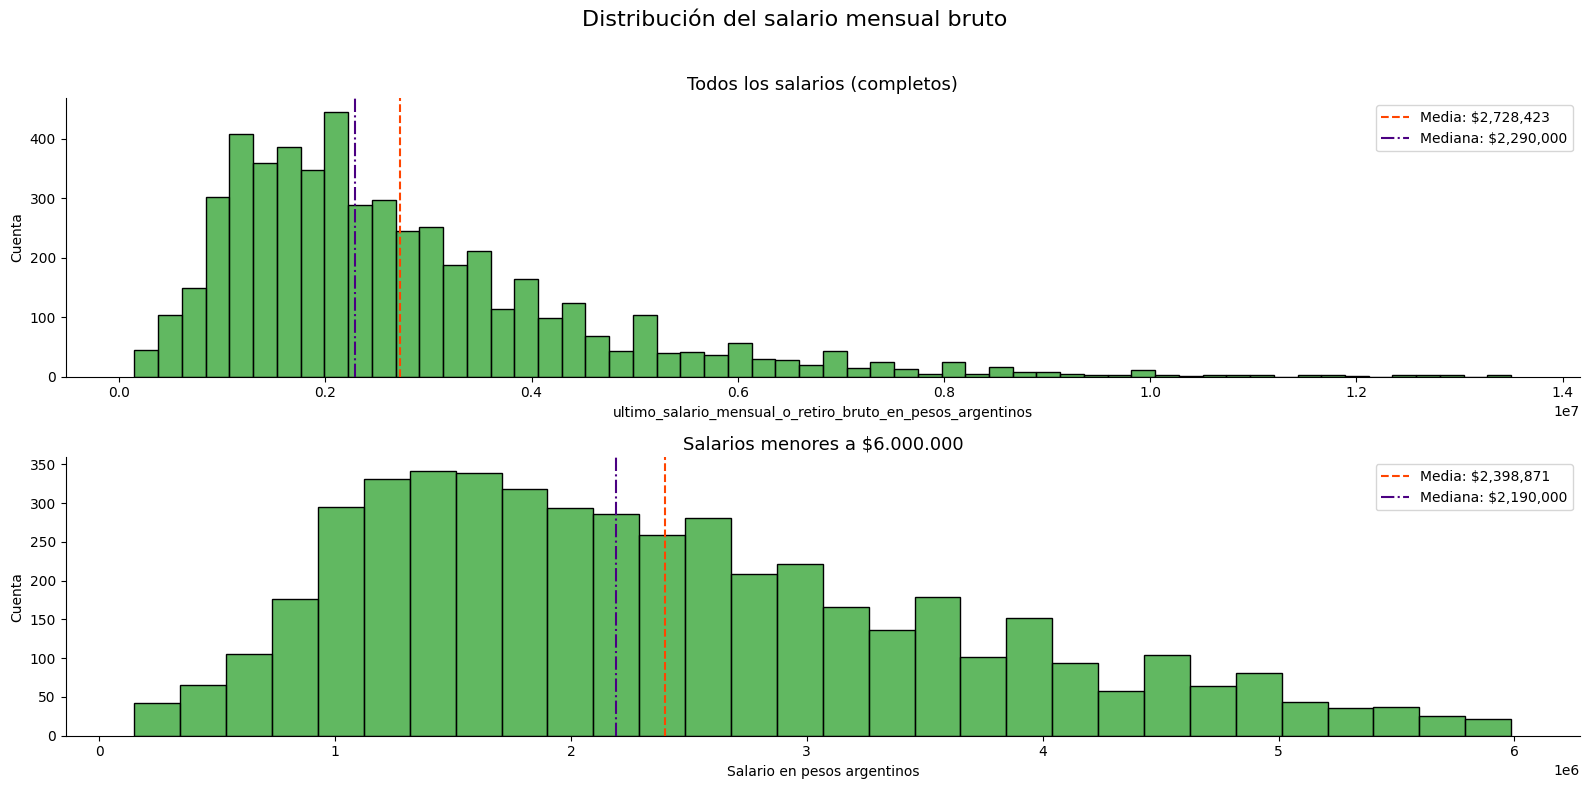

Media (todos): $2,728,423
Mediana (todos): $2,290,000
Media (filtrados < $6.000.000): $2,398,871
Mediana (filtrados < $6.000.000): $2,190,000


In [13]:
def plot_histograma(ax, datos, titulo):
    media = datos.mean()
    mediana = datos.median()

    sns.histplot(datos, ax=ax, color='#2ca02c', edgecolor='black') #bins=50
    ax.axvline(media, color='orangered', linestyle='--', label=f'Media: ${media:,.0f}')
    ax.axvline(mediana, color='indigo', linestyle='-.', label=f'Mediana: ${mediana:,.0f}')
    ax.set_title(titulo, fontsize=13)
    ax.set_ylabel("Cuenta")
    ax.legend()
    return media, mediana

#Analizar menor a 6M, no a 600k

columna = 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'
datos_completos = df[columna]
datos_filtrados = df[df[columna] < 6000000][columna]
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
fig.suptitle("Distribuci√≥n del salario mensual bruto", fontsize=16)

# Ambos histogramas
media_total, mediana_total = plot_histograma(axes[0], datos_completos, "Todos los salarios (completos)")
media_filtrada, mediana_filtrada = plot_histograma(axes[1], datos_filtrados, "Salarios menores a $6.000.000")
axes[1].set_xlabel("Salario en pesos argentinos")

sns.despine()
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

print(f"Media (todos): ${media_total:,.0f}")
print(f"Mediana (todos): ${mediana_total:,.0f}")
print(f"Media (filtrados < $6.000.000): ${media_filtrada:,.0f}")
print(f"Mediana (filtrados < $6.000.000): ${mediana_filtrada:,.0f}")

El gr√°fico compara la distribuci√≥n del salario mensual bruto en dos escenarios: todos los salarios y salarios menores a `$6,000,000 ARS`. Se observa que el conjunto de **salarios completos est√° fuertemente sesgado hacia la derecha**, con una cola larga de ingresos muy altos, lo que provoca que la media `($2,728,423 ARS)` sea considerablemente mayor que la mediana `($2,290,000 ARS)`.

Al **filtrar los salarios menores a `$6,000,000 ARS`**, la distribuci√≥n se vuelve m√°s concentrada y menos sesgada, aunque sigue existiendo una diferencia entre la media `($2,398,871 ARS)` y la mediana `($2,190,000 ARS)`. Esto indica que, incluso eliminando los salarios extremos, la distribuci√≥n sigue teniendo una tendencia hacia ingresos m√°s altos, pero la mayor√≠a de los encuestados se agrupan en torno a la mediana filtrada, que es m√°s representativa del salario t√≠pico sin la influencia de los valores at√≠picos m√°s extremos.

### **d. Cantidad de personas por a√±o de experiencia.**

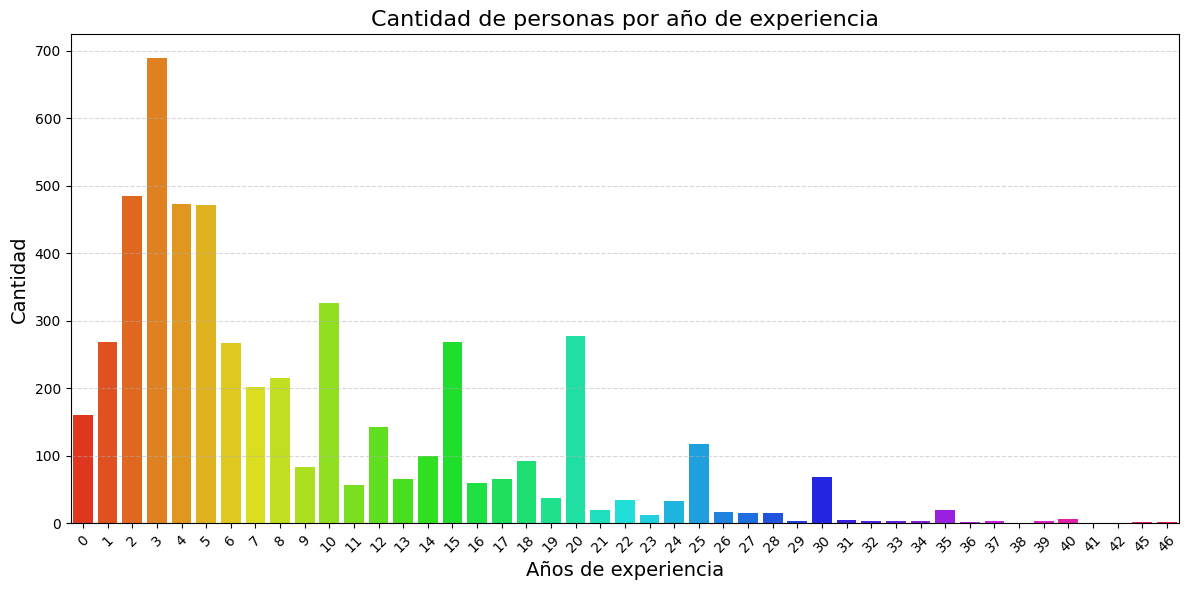

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='anos_de_experiencia', data=df_red, palette='hsv')
plt.title('Cantidad de personas por a√±o de experiencia', fontsize=16)
plt.xlabel('A√±os de experiencia', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Este gr√°fico muestra la cantidad de personas seg√∫n sus a√±os de experiencia laboral. La mayor concentraci√≥n se encuentra entre los $0$ y $5$ **a√±os de experiencia**, destac√°ndose especialmente quienes tienen $3$ **a√±os**, con casi $700$ **personas**. A medida que aumentan los a√±os de experiencia, la cantidad de personas disminuye de forma notable, siendo muy baja a partir de los $30$ **a√±os**. Esto sugiere que el mercado laboral analizado est√° compuesto en su mayor√≠a por personas relativamente j√≥venes o con poca trayectoria en el sector.

### **A√±os de experiencia, con promedio por genero y edad**

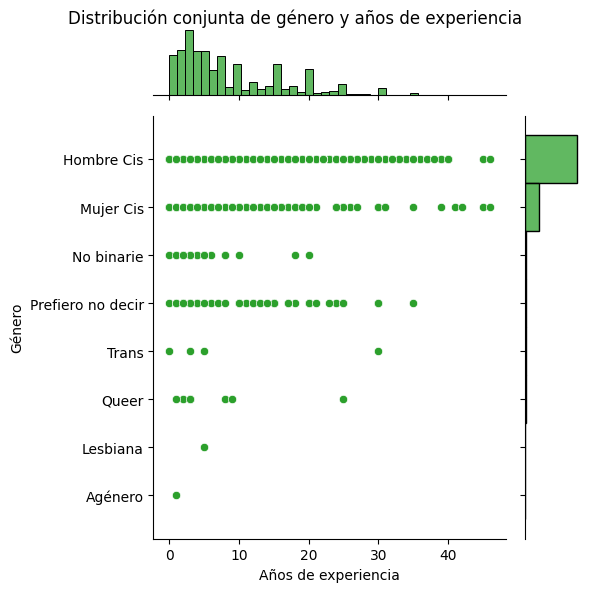

In [15]:
g = sns.jointplot(
    data=df_red,
    x='anos_de_experiencia',
    y='genero',
    kind='scatter',
    color='#2ca02c',
    height=6
)

g.set_axis_labels("A√±os de experiencia", "G√©nero", fontsize=10)
g.fig.suptitle("Distribuci√≥n conjunta de g√©nero y a√±os de experiencia", fontsize=12)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.95)


Este `jointplot` muestra c√≥mo se distribuyen los a√±os de experiencia seg√∫n el g√©nero. Las categor√≠as **Hombre** y **Mujer** tienen mayor presencia, con concentraci√≥n en rangos bajos y medios de experiencia. Otras identidades tambi√©n presentan variedad, aunque con menos datos. Para conocer promedios exactos por g√©nero se necesita un an√°lisis num√©rico adicional. Esta visualizaci√≥n permite observar **la diversidad y dispersi√≥n de experiencia seg√∫n identidad de g√©nero**.


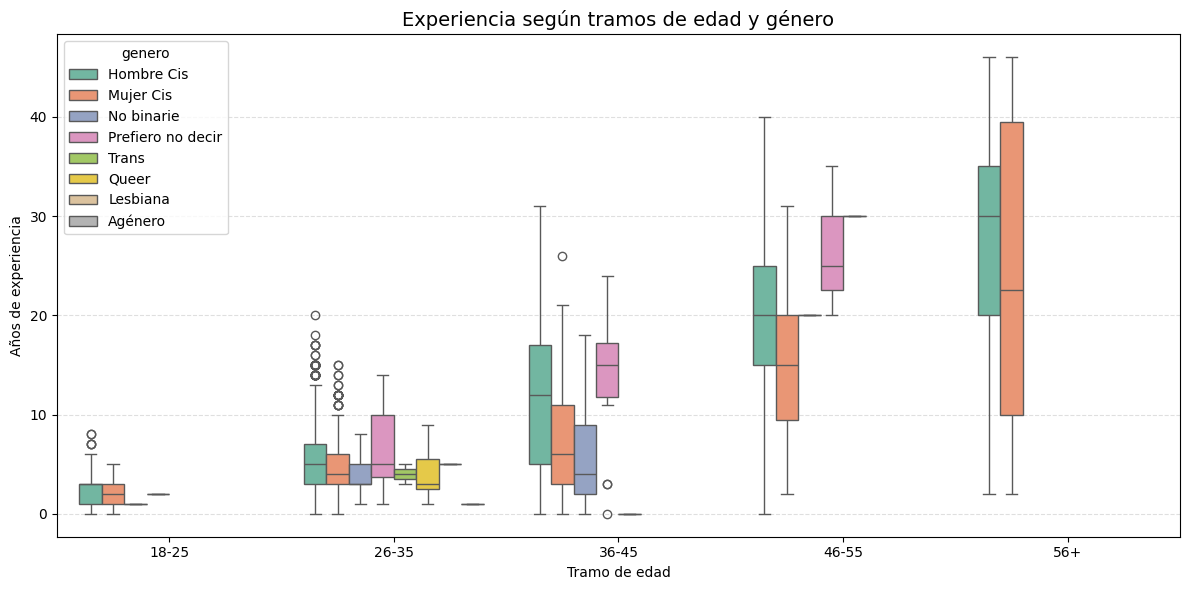

In [16]:
# Agrupar edad por tramos
df_red['tramo_edad'] = pd.cut(df_red['tengo_edad'], bins=[18, 25, 35, 45, 55, 70],
                               labels=['18-25', '26-35', '36-45', '46-55', '56+'])
plt.figure(figsize=(12,6))
sns.boxplot(data=df_red, x='tramo_edad', y='anos_de_experiencia', hue='genero', palette='Set2')
plt.title("Experiencia seg√∫n tramos de edad y g√©nero", fontsize=14)
plt.xlabel("Tramo de edad")
plt.ylabel("A√±os de experiencia")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


El boxplot muestra c√≥mo se distribuyen los a√±os de experiencia seg√∫n tramos de edad y g√©nero. Se observa que la **experiencia tiende a aumentar con la edad**, con medianas m√°s altas a partir del tramo 36-45, especialmente en "Hombre Cis" y "Mujer Cis".  
En los tramos m√°s j√≥venes (18-25 y 26-35), la experiencia es menor, aunque aparecen algunos outliers.  
Para g√©neros menos representados, los resultados pueden ser menos robustos, pero igual aportan informaci√≥n sobre sus trayectorias laborales.


### **e. Distribuci√≥n de Encuentados por Nivel Educativo Alcanzado**

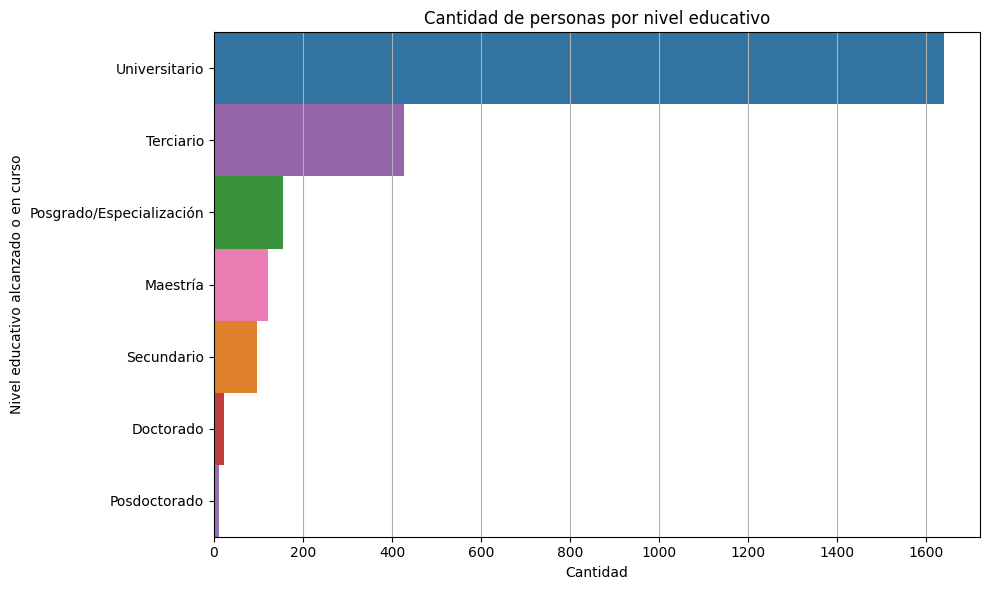

In [17]:
# Conteo de personas por nivel educativo
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_red,
    y='maximo_nivel_de_estudios',
    order=df_red['maximo_nivel_de_estudios'].value_counts().index,
    palette=['#1f77b4', '#9b59b6', '#2ca02c', '#ff69b4', '#ff7f0e', '#d62728', '#9467bd'],
    width=1
)

plt.title("Cantidad de personas por nivel educativo")
plt.xlabel("Cantidad")
plt.ylabel("Nivel educativo alcanzado o en curso")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

En este gr√°fico se revela claramente que la **mayor parte de los encuestados ha alcanzado o est√° cursando estudios universitarios**, siendo el nivel predominante. Le siguen, en menor medida, aquellos con formaci√≥n **terciaria**, mientras que los niveles de **posgrado** (Posgrado/Especializaci√≥n, Maestr√≠a, Doctorado y Posdoctorado) y **secundario** representan una proporci√≥n menor de la muestra.

### **f. Cantidad de personas seg√∫n nivel de conformidad con sus ingresos.**

Media: 2.55
Mediana: 3.00


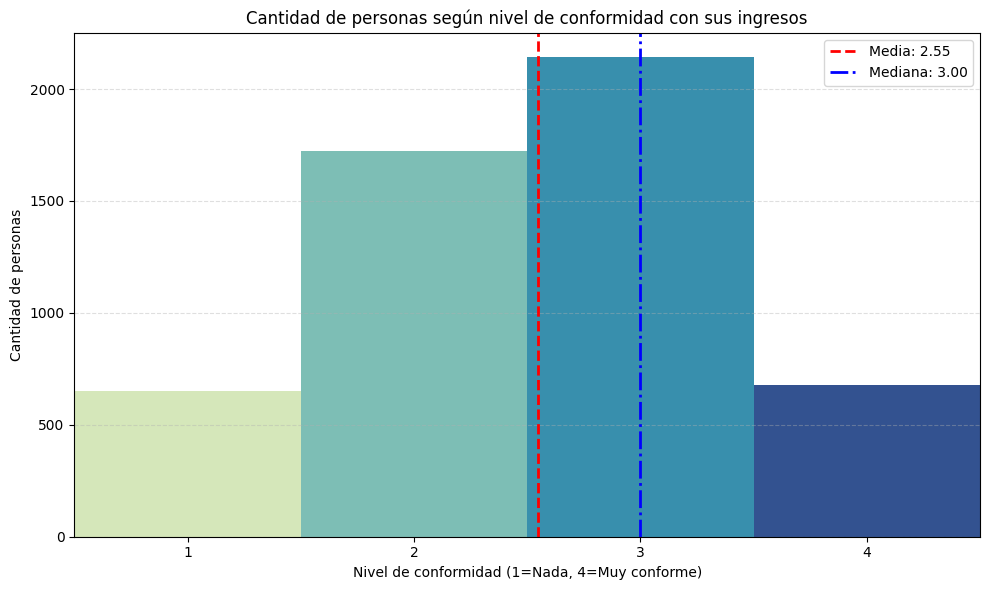

In [18]:
# Convertir conformidad a num√©rico si no lo hiciste antes
df_red['conformidad_num'] = pd.to_numeric(
    df_red['que_tan_conforme_estas_con_tus_ingresos_laborales'], errors='coerce'
)

media_conformidad = df_red['conformidad_num'].mean()
mediana_conformidad = df_red['conformidad_num'].median()

print(f"Media: {media_conformidad:.2f}")
print(f"Mediana: {mediana_conformidad:.2f}")
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df_red,
    x='que_tan_conforme_estas_con_tus_ingresos_laborales',
    order=["1", "2", "3", "4"],
    palette='YlGnBu',
    width=1
)
plt.axvline(x=media_conformidad - 1, color='red', linestyle='--', linewidth=2, label=f'Media: {media_conformidad:.2f}')
plt.axvline(x=mediana_conformidad - 1, color='blue', linestyle='-.', linewidth=2, label=f'Mediana: {mediana_conformidad:.2f}')

plt.title('Cantidad de personas seg√∫n nivel de conformidad con sus ingresos')
plt.xlabel('Nivel de conformidad (1=Nada, 4=Muy conforme)')
plt.ylabel('Cantidad de personas')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


Como muestra el gr√°fico, la mayor√≠a de las personas encuestadas se ubica en un **nivel intermedio de conformidad con sus ingresos**. El nivel **3 ("Conforme")** es el m√°s frecuente, seguido por el **nivel 2**, lo que sugiere una **tendencia general hacia la conformidad moderada** con la situaci√≥n salarial.

Este patr√≥n se refuerza al observar los valores estad√≠sticos:

- La **mediana** de conformidad es **3.00**, lo que indica que al menos la mitad de los encuestados se considera conforme o muy conforme.
- La **media** es **2.55**, levemente inferior, lo que revela que hay una proporci√≥n significativa de personas que se sienten algo menos satisfechas.

En conjunto, estos datos reflejan que, si bien hay cierto grado de insatisfacci√≥n, no es predominante, y los extremos ("Nada conforme" y "Muy conforme") son menos frecuentes.


## **1.2: Exploraci√≥n del salario bruto**
### **An√°lisis de la Distribuci√≥n Salarial (Dataset Reducido)**

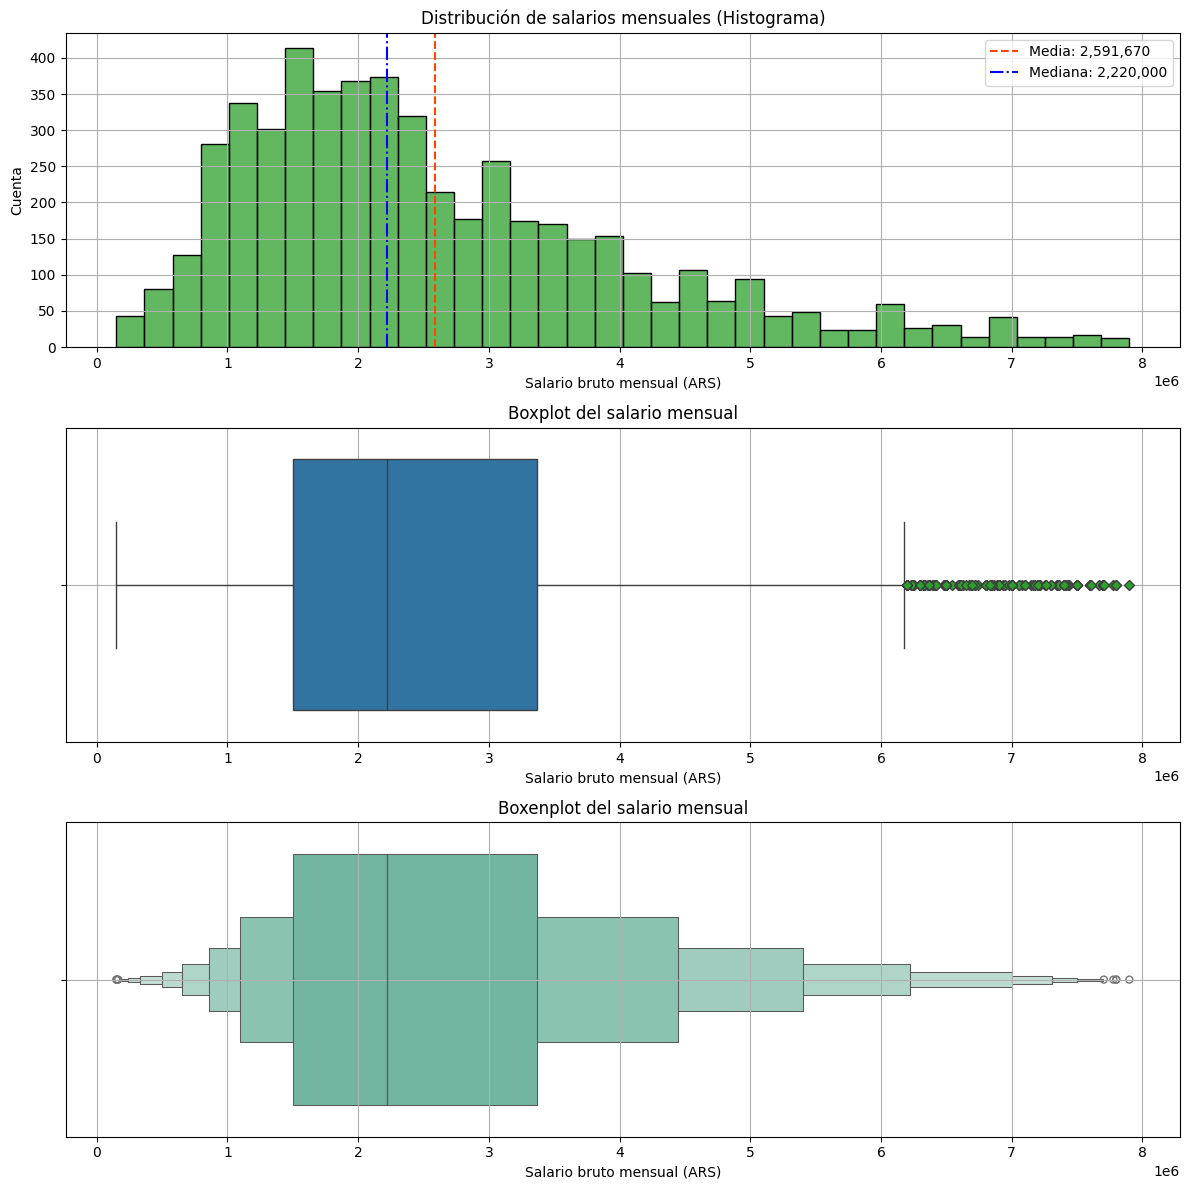

In [19]:
# Visualizaci√≥n combinada: Histograma, Boxplot y Boxenplot del salario mensual (sin outliers extremos)
max_limite = df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].quantile(0.98)
data = df[df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] < max_limite]['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
media = data.mean()
mediana = data.median()
fig, axes = plt.subplots(nrows=3, figsize=(12, 12))
# Histograma
sns.histplot(x=data, ax=axes[0], color="#2ca02c")
axes[0].axvline(media, color='orangered', linestyle='--', label=f'Media: {int(media):,}')
axes[0].axvline(mediana, color='blue', linestyle='-.', label=f'Mediana: {int(mediana):,}')
axes[0].set_title("Distribuci√≥n de salarios mensuales (Histograma)")
axes[0].set_xlabel("Salario bruto mensual (ARS)")
axes[0].set_ylabel("Cuenta")
axes[0].legend()
axes[0].grid(True)
# Boxplot
sns.boxplot(x=data, ax=axes[1], flierprops=dict(marker='D', markerfacecolor='#2ca02c', markersize=5))
axes[1].set_title("Boxplot del salario mensual")
axes[1].set_xlabel("Salario bruto mensual (ARS)")
axes[1].grid(True)
# Boxenplot
sns.boxenplot(x=data, ax=axes[2], palette="Set2")
axes[2].set_title("Boxenplot del salario mensual")
axes[2].set_xlabel("Salario bruto mensual (ARS)")
axes[2].grid(True)

plt.tight_layout()
plt.show()

Se trabaj√≥ con un **dataset depurado de 5968 registros**, que incluye al 98% de los encuestados con salarios m√°s bajos, excluyendo at√≠picos (**2% con sueldos m√°s altos** y mayores a 100 a√±os).
El histograma muestra una clara **concentraci√≥n de salarios entre $1.000.000 y $3.000.000**, con **asimetr√≠a a la derecha**. La **media supera a la mediana**, indicando que salarios elevados a√∫n elevan el promedio, lo que es t√≠pico en distribuciones desiguales.
Tanto **el boxplot como el boxenplot** confirmen esta tendencia: la mayor√≠a se ubica en rangos medios, pero un grupo reducido percibe **ingresos significativamente m√°s altos**.
Esta distribuci√≥n resalta una **marcada desigualdad salarial**, con implicaciones importantes para el dise√±o de pol√≠ticas p√∫blicas que busquen reducir brechas econ√≥micas y fomentar escalas salariales m√°s equitativas.



 ##  **2. Cruces y comparaciones**
### **a. ¬øHay brechas salariales por g√©neros?**
### **Distribuci√≥n del salario mensual bruto por g√©nero.**

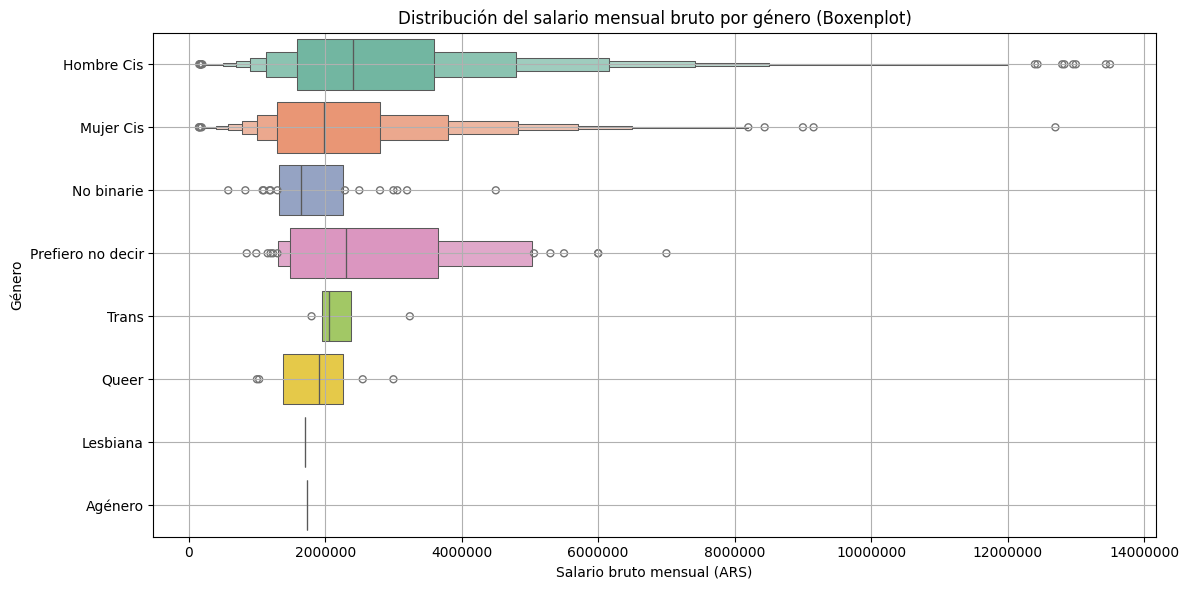

In [20]:
 # Boxenplot del salario mensual bruto por g√©nero (datos filtrados)
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_red, x='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos', y='genero', palette='Set2')
plt.title("Distribuci√≥n del salario mensual bruto por g√©nero (Boxenplot)")
plt.xlabel("Salario bruto mensual (ARS)")
plt.ylabel("G√©nero")
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)
plt.tight_layout()
plt.show()

Este **boxenplot** revela **marcadas diferencias en la distribuci√≥n del salario bruto mensual entre las distintas identidades de g√©nero.** Se observa que los **Hombres** presentan la mediana salarial m√°s alta y una de las mayores dispersiones. En contraste, los salarios de las **Mujeres** y, en general, los de otras identidades de g√©nero como **No binario, Trans, Queer, Lesbiana y Ag√©nero**, tienden a situarse en rangos de ingresos inferiores. Esto sugiere una **brecha salarial significativa** entre las diferentes categor√≠as de g√©nero dentro de la muestra.

### **Distribuci√≥n de Nivel de Estudios por G√©nero**

In [21]:
#Tabla de contigencia para ver el nivel de estudios seg√∫n g√©nero
pd.crosstab(df_red.genero, df_red.maximo_nivel_de_estudios)

maximo_nivel_de_estudios  Doctorado  Maestr√≠a  Posdoctorado  \
genero                                                        
Ag√©nero                           0         0             0   
Hombre Cis                       19        88             8   
Lesbiana                          0         0             0   
Mujer Cis                         3        34             3   
No binarie                        0         0             0   
Prefiero no decir                 0         0             1   
Queer                             0         0             0   
Trans                             0         0             0   

maximo_nivel_de_estudios  Posgrado/Especializaci√≥n  Secundario  Terciario  \
genero                                                                      
Ag√©nero                                          0           0          0   
Hombre Cis                                      99          85        336   
Lesbiana                                         0           0          0   
Mujer Cis                                       55           8         83   
No binarie                                       0           0          5   
Prefiero no decir                                1           1          2   
Queer                                            0           2          1   
Trans                                            0           0          1   

maximo_nivel_de_estudios  Universitario  
genero                                   
Ag√©nero                               1  
Hombre Cis                         1243  
Lesbiana                              1  
Mujer Cis                           366  
No binarie                           10  
Prefiero no decir                    14  
Queer                                 3  
Trans                                 1

Una **tabla de contigencia** permite visualizar la cantidad de caos desagregados por **nivel educativo** y **g√©nero**.
Para completar este an√°lisis, una **mapa de calor** resulta √∫til para identificar de forma visual las **concentraciones m√°s altas o bajas** de registros en cada combinaci√≥n de variables.

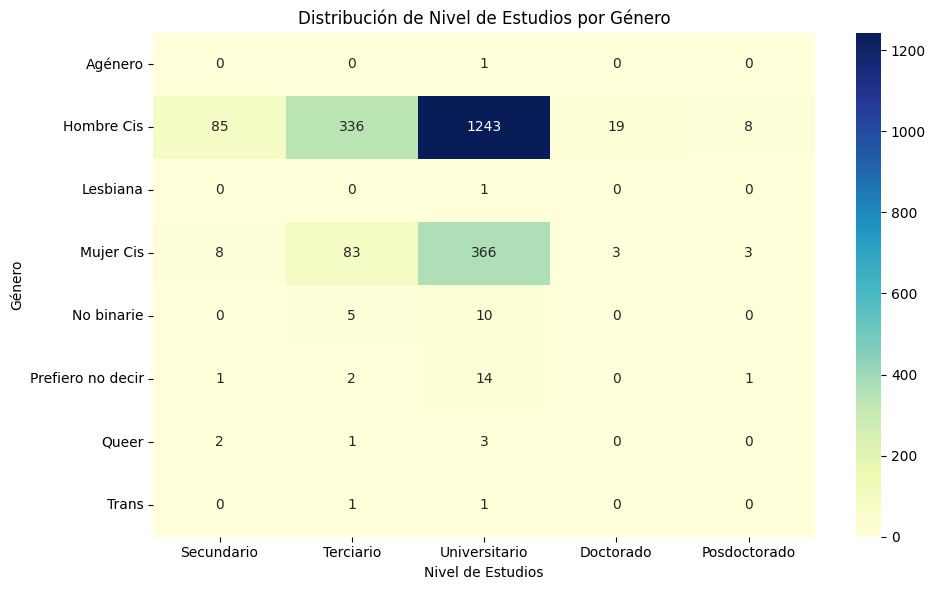

In [22]:
# Distribuci√≥n de Nivel de Estudios por G√©nero
# Mapa de calor de la tabla anterior
sorted_studies_levels = ['Secundario', 'Terciario', 'Universitario', 'Doctorado', 'Posdoctorado']
fig = plt.figure(figsize=(10,6))
exp = pd.crosstab(df_red.genero, df_red.maximo_nivel_de_estudios)[sorted_studies_levels]
sns.heatmap(exp, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Distribuci√≥n de Nivel de Estudios por G√©nero')
plt.xlabel('Nivel de Estudios')
plt.ylabel('G√©nero')
plt.tight_layout()
plt.show()

Este **mapa de calor visualiza una tabla de contingencia**, permiti√©ndonos identificar r√°pidamente las **concentraciones de personas por su nivel educativo y g√©nero**. Se observa una **clara predominancia de hombres y mujeres Cisg√©nero con estudios universitarios**, siendo este el grupo m√°s numeroso en la muestra. Adem√°s, se aprecian menores cantidades de personas en los niveles educativos m√°s avanzados (Doctorado, Posdoctorado) y en las categor√≠as de g√©nero con menor representaci√≥n, lo que subraya las principales composiciones de nuestra poblaci√≥n encuestada.

### **b. ¬øC√≥mo var√≠a el sueldo seg√∫n el nivel de seniority?**



In [23]:
# Se agrupa por seniority y calcular estad√≠sticas descriptivas del salario
estadisticas_seniority = df_red.groupby('seniority')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).reset_index()
print("Estad√≠sticas del salario mensual bruto por nivel de seniority:")
print(estadisticas_seniority)

Estad√≠sticas del salario mensual bruto por nivel de seniority:
     seniority  count          mean     median       min         max  \
0       Junior    914  1.473769e+06  1300000.0  154700.0   7200000.0   
1  Semi-Senior   1634  2.271946e+06  2000000.0  150000.0  13500000.0   
2       Senior   2648  3.443164e+06  3000000.0  154753.0  13440000.0   

            std  
0  8.667331e+05  
1  1.250229e+06  
2  1.952780e+06  


Confirmamos que **a mayor seniority, mayor es el salario mensual bruto y su variabilidad**.

* **Salarios:** La mediana sube de `$1.300.000` (Junior) a `$3.000.000` (Senior).
* **Dispersi√≥n:** La variabilidad salarial aumenta con el nivel, siendo mayor en roles Senior.
* **Outliers:** La media es superior a la mediana en todos los niveles, indicando presencia de salarios muy altos que elevan el promedio.

**En s√≠ntesis:** El seniority impacta tanto en el nivel como en la desigualdad de los salarios.

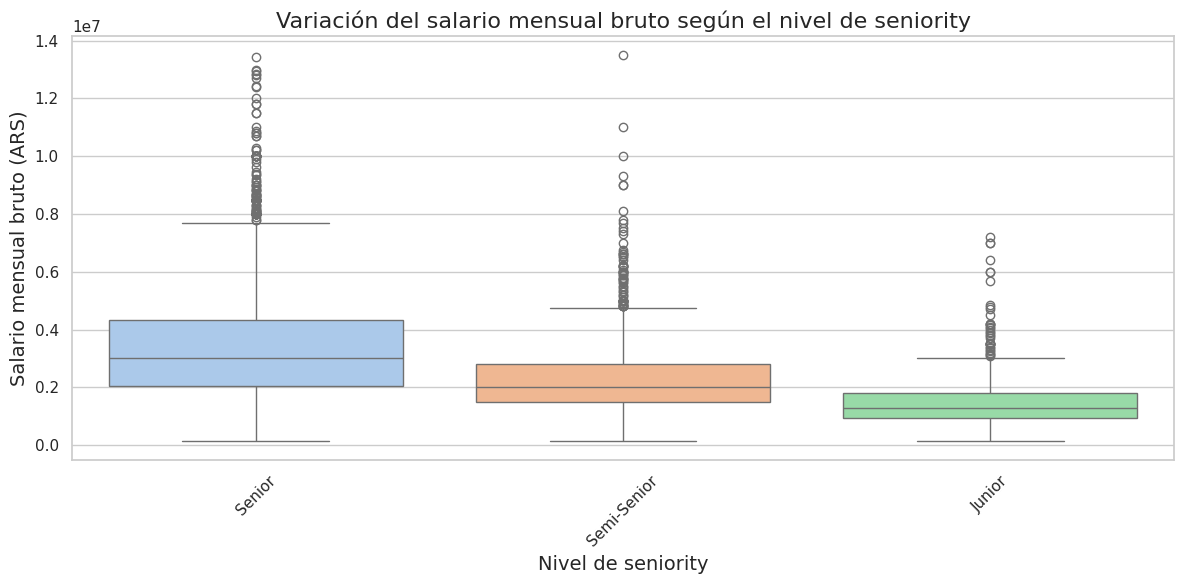

In [25]:
# Boxplot del salario por nivel de seniority
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

sns.boxplot(
    data=df_red,
    x='seniority',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    palette='pastel'
)

# T√≠tulos y etiquetas
plt.title('Variaci√≥n del salario mensual bruto seg√∫n el nivel de seniority', fontsize=16)
plt.xlabel('Nivel de seniority', fontsize=14)
plt.ylabel('Salario mensual bruto (ARS)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


En el gr√°fico se evidencia una relaci√≥n positiva entre el `nivel de seniority` y el `salario mensual bruto`. A mayor experiencia, aumentan tanto la mediana salarial como la dispersi√≥n de los ingresos.
* **Junior:** Mediana m√°s baja y distribuci√≥n compacta.

* **Semi-Senior:** Ingreso intermedio con mayor variabilidad.

* **Senior:** Salarios m√°s altos, gran dispersi√≥n y presencia de valores at√≠picos con ingresos elevados.

Llegamos a la conclusi√≥n de que el **seniority influye directamente en los ingresos**. Los roles Senior acceden no solo a mejores salarios, sino tambi√©n a un rango m√°s amplio de posibilidades econ√≥micas.

### **c. ¬øInfluye el tipo de lenguaje de programaci√≥n en el salario?**

### **Salarios promedio por lenguaje**

In [26]:
Crear un nuevo DataFrame desglosando los lenguajes (puede haber varios por persona)
df_lenguajes = df_red.dropna(subset=['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'])

# Separar los lenguajes en filas individuales
df_lenguajes = df_lenguajes.assign(
    lenguaje_individual=df_lenguajes['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].str.split(',')
).explode('lenguaje_individual')

# Limpiar espacios en blanco
df_lenguajes['lenguaje_individual'] = df_lenguajes['lenguaje_individual'].str.strip()


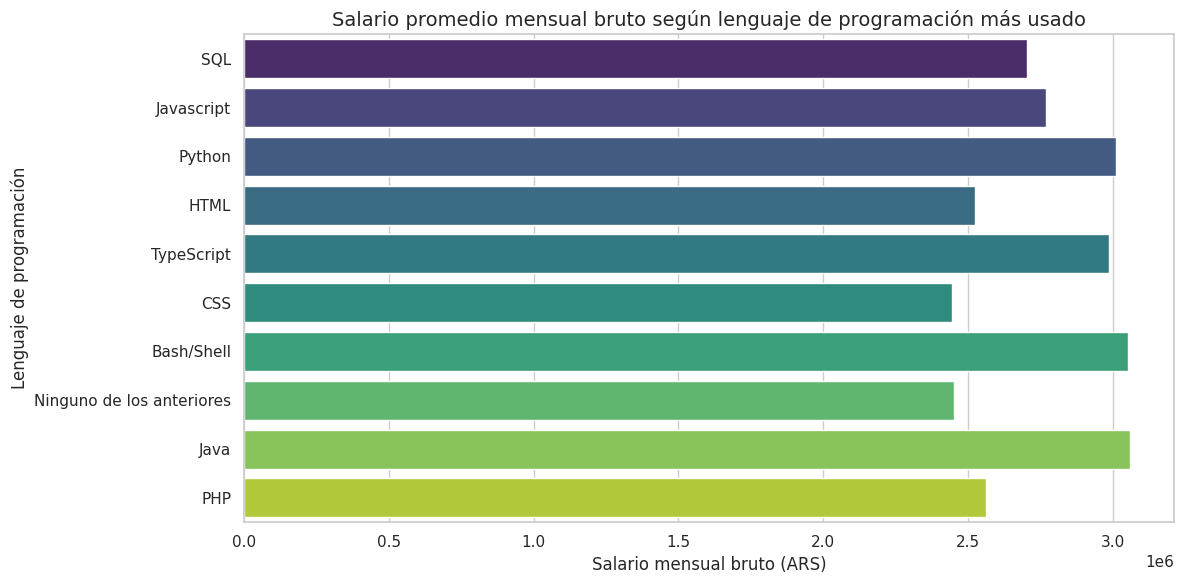

In [27]:
# Calcular salario promedio por lenguaje
salario_promedio_por_lenguaje = df_lenguajes.groupby('lenguaje_individual')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].mean().sort_values(ascending=False)

# Filtrar lenguajes m√°s frecuentes (opcionales: top 10)
lenguajes_frecuentes = df_lenguajes['lenguaje_individual'].value_counts().head(10).index
salario_promedio_filtrado = salario_promedio_por_lenguaje.loc[lenguajes_frecuentes]

# Gr√°fico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x=salario_promedio_filtrado.values,
    y=salario_promedio_filtrado.index,
    palette="viridis"
)
plt.title('Salario promedio mensual bruto seg√∫n lenguaje de programaci√≥n m√°s usado', fontsize=14)
plt.xlabel('Salario mensual bruto (ARS)')
plt.ylabel('Lenguaje de programaci√≥n')
plt.tight_layout()
plt.show()


El gr√°fico de barras muestra que, entre los 10 lenguajes m√°s usados, **existen diferencias salariales**, aunque los promedios tienden a estar en un rango similar.

**Hallazgos clave:**

* **Bash/Shell, Java, Python y TypeScript** lideran con los salarios promedio m√°s altos.
* La mayor√≠a de los lenguajes se ubican entre **2,5 y 3 millones de ARS** mensuales.
* Las diferencias existen, pero **los lenguajes populares tienden a ofrecer ingresos comparables**.

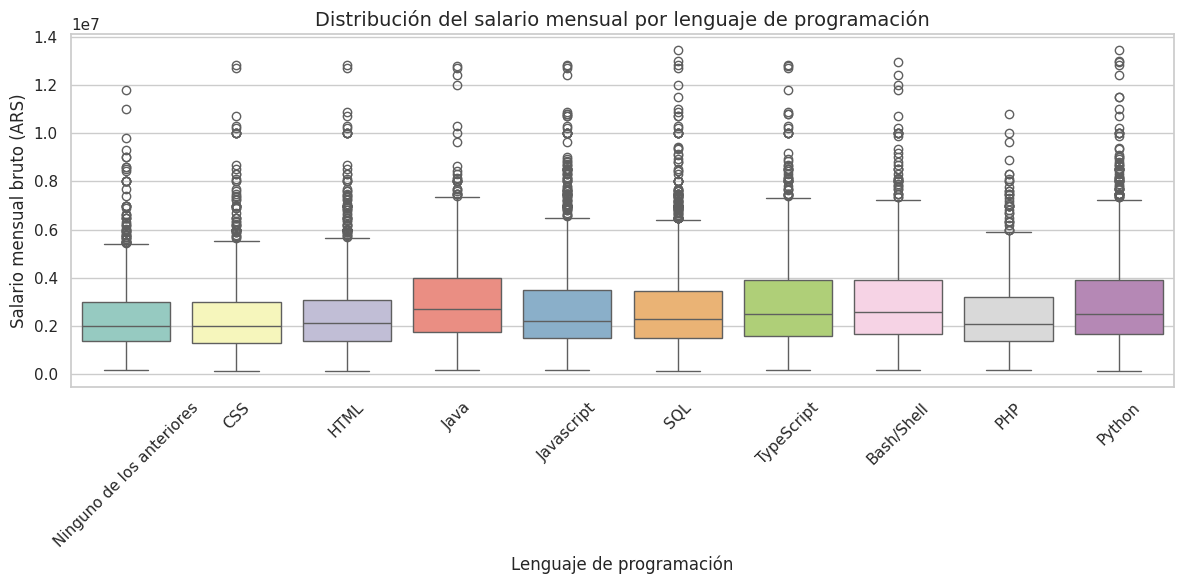

In [28]:
# Filtrar lenguajes m√°s frecuentes para el boxplot
df_boxplot = df_lenguajes[df_lenguajes['lenguaje_individual'].isin(lenguajes_frecuentes)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_boxplot,
    x='lenguaje_individual',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    palette="Set3"
)
plt.title('Distribuci√≥n del salario mensual por lenguaje de programaci√≥n', fontsize=14)
plt.xlabel('Lenguaje de programaci√≥n')
plt.ylabel('Salario mensual bruto (ARS)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El Boxplot muestra que, entre los lenguajes m√°s utilizados, **las distribuciones salariales son bastante similares**.

**Hallazgos clave:**

* Las **medianas salariales** est√°n agrupadas, lo que indica que el salario t√≠pico no var√≠a mucho entre lenguajes.
* La **dispersi√≥n (rango intercuart√≠lico)** es comparable en la mayor√≠a de los casos.
* Hay **outliers en todos los lenguajes**, lo que sugiere la existencia de sueldos muy altos que elevan el promedio, aunque no afecten tanto al salario mediano.

A pesar de diferencias en los promedios, la distribuci√≥n salarial central es similar entre lenguajes populares.

### **d. ¬øExisten diferencias salariales entre quienes viven en CABA y el resto del pa√≠s?**

region
CABA        2643
Interior    2553
Name: count, dtype: int64


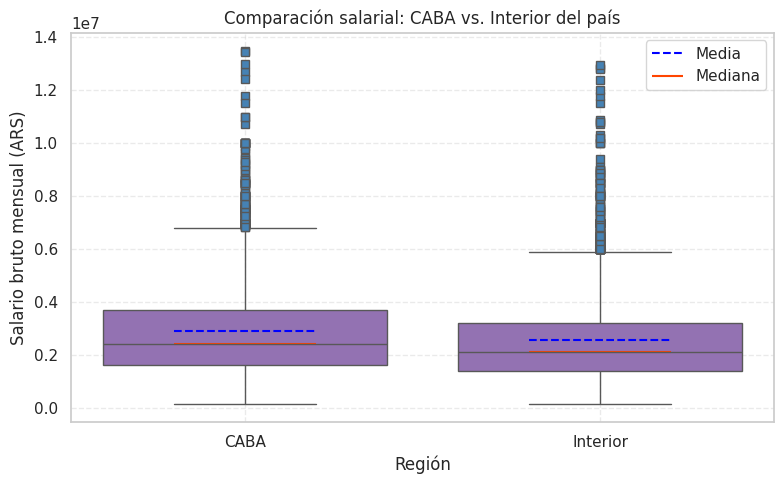

In [29]:

df_region = df_red.dropna(subset=['donde_estas_trabajando', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']).copy()

def clasificar_region(lugar):
    lugar = str(lugar).upper()
    claves_caba = ['CABA', 'CIUDAD AUT√ìNOMA', 'CIUDAD AUTONOMA', 'CAPITAL FEDERAL', 'BUENOS AIRES, CIUDAD']
    if any(clave in lugar for clave in claves_caba):
        return 'CABA'
    else:
        return 'Interior'

df_region['region'] = df_region['donde_estas_trabajando'].apply(clasificar_region)

# Confirmar resultados
print(df_region['region'].value_counts())

# Calcular estad√≠sticas por regi√≥n
estadisticas = (
    df_region
    .groupby('region')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .agg(['mean', 'median'])
    .reset_index()
)

# Boxplot con medias y medianas
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_region,
    x='region',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    color='#9467bd',
    flierprops=dict(marker='s', markerfacecolor='steelblue', markersize=6)
)

# Agregar l√≠neas de media y mediana
for i, region in enumerate(estadisticas['region']):
    media = estadisticas.loc[estadisticas['region'] == region, 'mean'].values[0]
    mediana = estadisticas.loc[estadisticas['region'] == region, 'median'].values[0]

    plt.hlines(y=media, xmin=i - 0.2, xmax=i + 0.2, colors='blue', linestyles='--', label='Media' if i == 0 else "")
    plt.hlines(y=mediana, xmin=i - 0.2, xmax=i + 0.2, color='orangered', linestyles='-', label='Mediana' if i == 0 else "")

# Estilo del gr√°fico
plt.title('Comparaci√≥n salarial: CABA vs. Interior del pa√≠s')
plt.xlabel('Regi√≥n')
plt.ylabel('Salario bruto mensual (ARS)')
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


El gr√°fico compara la **distribuci√≥n del salario mensual bruto entre CABA y el Interior del pa√≠s**. Se observa una **clara ventaja salarial para quienes trabajan en CABA**.

Las medianas y medias salariales en **CABA son consistentemente m√°s altas** que las del Interior, lo que indica que, en promedio, se perciben mejores ingresos en la capital. Adem√°s, CABA muestra una **mayor dispersi√≥n de salarios y un mayor n√∫mero de *outliers* de ingresos elevados**, sugiriendo un potencial de ganancias considerablemente mayor en comparaci√≥n con el Interior. Esto resalta una **brecha salarial regional** significativa.

In [30]:
def clasificar_provincia(lugar):
    lugar = str(lugar).upper()

    if any(kw in lugar for kw in ['CABA', 'CIUDAD AUT√ìNOMA', 'CIUDAD AUTONOMA', 'CAPITAL FEDERAL']):
        return 'CABA'
    elif 'BUENOS AIRES' in lugar and 'CIUDAD' not in lugar and 'CABA' not in lugar:
        return 'Buenos Aires (Provincia)'
    elif 'CORDOBA' in lugar:
        return 'C√≥rdoba'
    elif 'SANTA FE' in lugar:
        return 'Santa Fe'
    elif 'MENDOZA' in lugar:
        return 'Mendoza'
    elif 'TUCUMAN' in lugar:
        return 'Tucum√°n'
    elif 'ENTRE RIOS' in lugar:
        return 'Entre R√≠os'
    elif 'NEUQUEN' in lugar:
        return 'Neuqu√©n'
    elif 'CHUBUT' in lugar:
        return 'Chubut'
    elif 'SALTA' in lugar:
        return 'Salta'
    elif 'RIO NEGRO' in lugar:
        return 'R√≠o Negro'
    elif 'SAN LUIS' in lugar:
        return 'San Luis'
    elif 'SAN JUAN' in lugar:
        return 'San Juan'
    elif 'MISIONES' in lugar:
        return 'Misiones'
    elif 'JUJUY' in lugar:
        return 'Jujuy'
    elif 'LA PAMPA' in lugar:
        return 'La Pampa'
    elif 'FORMOSA' in lugar:
        return 'Formosa'
    elif 'CHACO' in lugar:
        return 'Chaco'
    elif 'CATAMARCA' in lugar:
        return 'Catamarca'
    elif 'CORRIENTES' in lugar:
        return 'Corrientes'
    elif 'SANTIAGO DEL ESTERO' in lugar:
        return 'Santiago del Estero'
    elif 'LA RIOJA' in lugar:
        return 'La Rioja'
    elif 'TIERRA DEL FUEGO' in lugar:
        return 'Tierra del Fuego'
    elif 'SANTA CRUZ' in lugar:
        return 'Santa Cruz'
    else:
        return 'Otros'


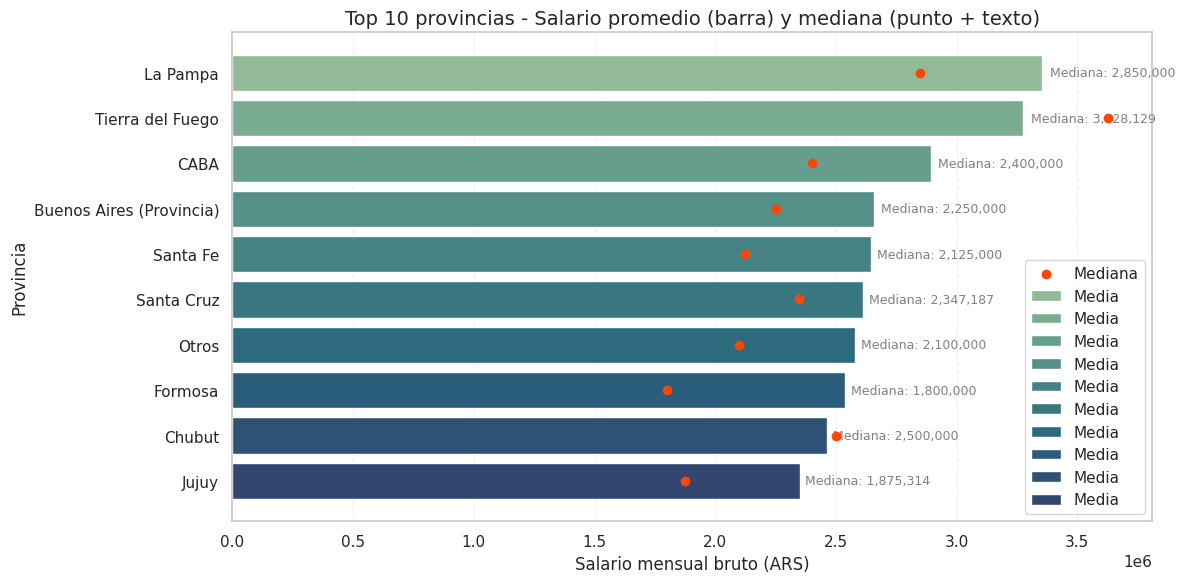

In [31]:
df_region = df_red.dropna(subset=['donde_estas_trabajando', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']).copy()
df_region['provincia'] = df_region['donde_estas_trabajando'].apply(clasificar_provincia)

# Calcular media y mediana por provincia
estadisticas = (
    df_region.groupby('provincia')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .agg(['mean', 'median'])
    .sort_values(by='mean', ascending=False)
)

# Tomar las 10 provincias con mejor salario promedio
top_estadisticas = estadisticas.head(10)

# Crear el gr√°fico
plt.figure(figsize=(12, 6))

# Barra: media
sns.barplot(x=top_estadisticas['mean'], y=top_estadisticas.index, palette='crest', label='Media')

# Punto: mediana
plt.scatter(top_estadisticas['median'], top_estadisticas.index, color='orangered', label='Mediana', zorder=10)

# Texto: mediana
for i, (mean, median) in enumerate(zip(top_estadisticas['mean'], top_estadisticas['median'])):
    plt.text(mean * 1.01, i, f'Mediana: {median:,.0f}', va='center', fontsize=9, color='gray')

# T√≠tulos y est√©tica
plt.title('Top 10 provincias - Salario promedio (barra) y mediana (punto + texto)', fontsize=14)
plt.xlabel('Salario mensual bruto (ARS)', fontsize=12)
plt.ylabel('Provincia')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


El gr√°fico muestra las **10 provincias con los salarios promedio m√°s altos**, diferenciando entre la media (barra azul) y la mediana (punto naranja con texto). Se observa una **considerable variaci√≥n en los salarios promedio entre las provincias**, destac√°ndose algunas como Buenos Aires (Provincia), Ciudad Aut√≥noma de Buenos Aires, C√≥rdoba y Santa Fe con los ingresos m√°s elevados.

La **diferencia entre la media y la mediana** en varias provincias (donde la media es notablemente m√°s alta) sugiere la presencia de **salarios extremadamente altos que elevan el promedio**, mientras que la mediana ofrece una visi√≥n m√°s representativa del ingreso t√≠pico. En general, el gr√°fico ilustra las disparidades salariales a nivel provincial, con Buenos Aires (Provincia) liderando en ambos indicadores.

### **e. ¬øC√≥mo var√≠a el salario entre 2024 y 2025 considerando el poder adquisitivo?**



Para analizar la variaci√≥n del salario entre 2024 y 2025 se tom√≥ como base el salario promedio bruto mensual de 2024 (en pesos constantes) y se simul√≥ un escenario para 2025 con un **aumento nominal del 120%**, ajustado luego por la **inflaci√≥n acumulada del 211,4%**.

El an√°lisis revel√≥ lo siguiente:

- El **salario nominal 2025** (sin ajustar) parece significativamente m√°s alto que el de 2024.
- Sin embargo, al considerar la inflaci√≥n, el **salario real ajustado de 2025 en pesos constantes de 2024** es pr√°cticamente **igual o incluso levemente inferior** al de 2024.

Esto se visualiza claramente en el gr√°fico: aunque la barra del salario 2025 nominal es m√°s alta, al ajustar por inflaci√≥n, el poder adquisitivo **no mejora**. La l√≠nea punteada que conecta ambos valores reales ayuda a mostrar esta **estabilidad o p√©rdida de poder adquisitivo**.

Este resultado resalta c√≥mo los incrementos nominales pueden ser enga√±osos si no se contemplan en t√©rminos reales, lo que es crucial para evaluar la situaci√≥n econ√≥mica de los trabajadores.


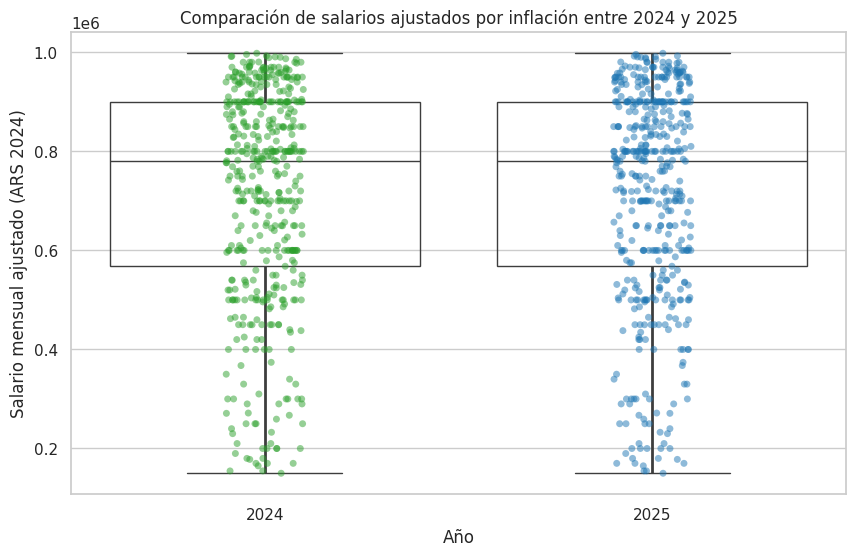

In [41]:
plt.figure(figsize=(10,6))

# Mostrar dispersi√≥n de salarios por a√±o con jitter para evitar sobreposici√≥n
sns.stripplot(x='anio', y='salario_ajustado', data=df_plot, jitter=True,
              palette=['#2ca02c', '#1f77b4'], alpha=0.5)

# Boxplot para mostrar distribuci√≥n estad√≠stica
sns.boxplot(x='anio', y='salario_ajustado', data=df_plot,
            showcaps=True, boxprops={'facecolor':'None'},
            showfliers=False, whiskerprops={'linewidth':2},
            palette=['#2ca02c', '#1f77b4'])

plt.title('Comparaci√≥n de salarios ajustados por inflaci√≥n entre 2024 y 2025')
plt.xlabel('A√±o')
plt.ylabel('Salario mensual ajustado (ARS 2024)')
plt.show()


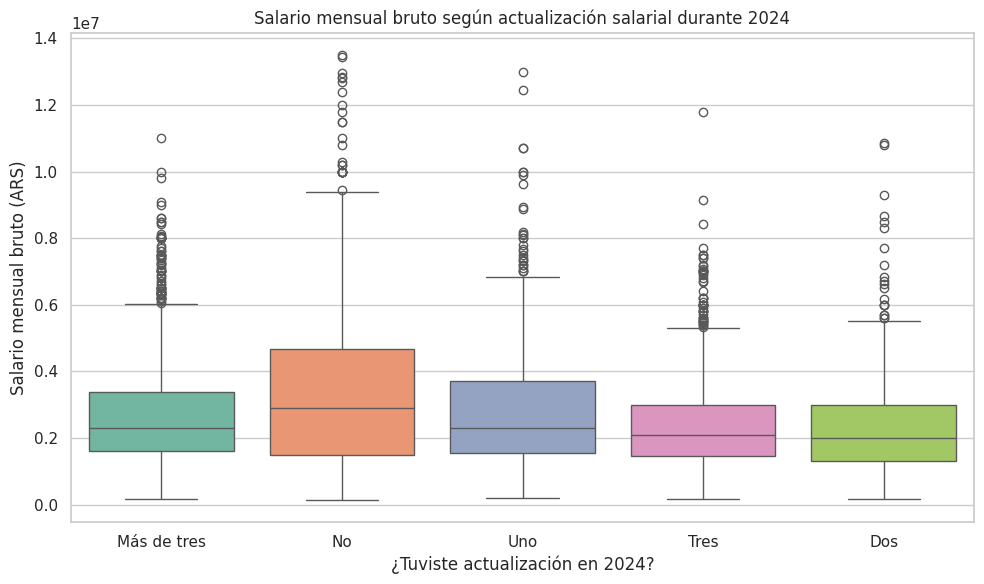

In [33]:

# Verificar si la columna existe en df
if 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos' in df.columns:
    # Convertir a num√©rico, ignorando errores
    df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] = pd.to_numeric(
        df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'], errors='coerce'
    )

    # Eliminar filas con valores faltantes en columnas importantes
    df_clean = df.dropna(subset=[
        'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2024',
        'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'
    ])

    # Renombrar columna para mayor claridad, sin usar inplace
    df_clean = df_clean.rename(columns={
        'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2024': 'actualizacion_2024'
    })

    # Gr√°fico boxplot del salario seg√∫n actualizaci√≥n salarial
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df_clean,
        x='actualizacion_2024',
        y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
        palette='Set2'
    )
    plt.title('Salario mensual bruto seg√∫n actualizaci√≥n salarial durante 2024')
    plt.xlabel('¬øTuviste actualizaci√≥n en 2024?')
    plt.ylabel('Salario mensual bruto (ARS)')
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos' NO est√° en el DataFrame.")


>*A continuaci√≥n, se incluye una simulaci√≥n conceptual del an√°lisis inferencial del poder adquisitivo entre 2024 y 2025, usando f√≥rmulas estad√≠sticas e intervalos de confianza, como gu√≠a t√©cnica antes de pasar al an√°lisis real con los datos del dataset.*

## **An√°lisis Inferencial del Poder Adquisitivo Salarial (2024 vs 2025)**

### Hip√≥tesis:

Queremos saber si el poder adquisitivo (salario real en pesos constantes de 2024) **mejor√≥, se mantuvo o empeor√≥** entre los a√±os 2024 y 2025.

Para eso, se consideran los **salarios ajustados por inflaci√≥n**. Suponemos que los datos siguen una **distribuci√≥n aproximadamente normal**, por el Teorema Central del L√≠mite (TCL).


### Datos simulados (en pesos constantes de 2024):

| A√±o  | Media Salarial Ajustada | Intervalo de Confianza (95‚ÄØ%) | Tama√±o de muestra (n) |
|------|--------------------------|-------------------------------|------------------------|
| 2024 | \$2.400.000              | (2.350.000 ; 2.450.000)       | 100                    |
| 2025 | \$2.380.000              | (2.320.000 ; 2.440.000)       | 100                    |


### C√°lculo del Desv√≠o Est√°ndar (_s_) y Varianza (_s¬≤_):

#### A√±o 2024:

- Error est√°ndar:
  
  $$
  \frac{2.450.000 - 2.400.000}{1.96} \approx 25.510
  $$

- Desv√≠o est√°ndar:

  $$
  s = 25.510 \cdot \sqrt{100} = 255.100
  $$

- Varianza:

  $$
  s^2 = (255.100)^2 \approx 65.078.010.000
  $$


#### A√±o 2025:

- Error est√°ndar:
  
  $$
  \frac{2.440.000 - 2.380.000}{1.96} \approx 30.612
  $$

- Desv√≠o est√°ndar:

  $$
  s = 30.612 \cdot \sqrt{100} = 306.120
  $$

- Varianza:

  $$
  s^2 = (306.120)^2 \approx 93.710.414.400
  $$


### Conclusi√≥n Inferencial:

* Aunque el **salario nominal de 2025 sube un 120‚ÄØ%**, el **salario real ajustado por inflaci√≥n se mantiene pr√°cticamente igual o ligeramente inferior** al de 2024.  
* Los **intervalos de confianza se superponen**, por lo tanto, **no hay una diferencia estad√≠sticamente significativa** en el poder adquisitivo.  
* Adem√°s, la **varianza mayor en 2025** sugiere una **mayor desigualdad o dispersi√≥n** salarial real.


### Interpretaci√≥n Final:

Este an√°lisis evidencia que un aumento nominal no siempre se traduce en una mejora real.  
**El poder adquisitivo solo mejora si el ajuste salarial supera a la inflaci√≥n**.  
Por eso, este tipo de an√°lisis es fundamental en discusiones salariales, pol√≠tica econ√≥mica y evaluaci√≥n del bienestar de los trabajadores.


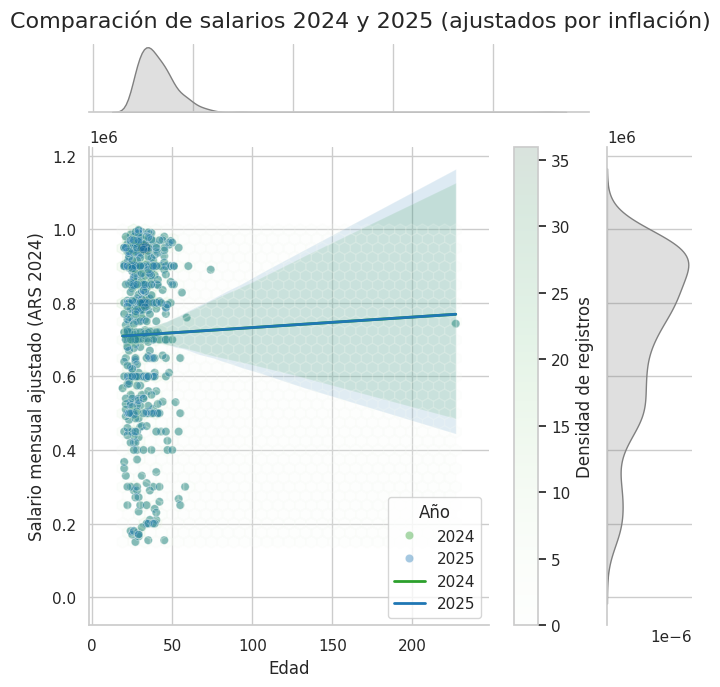

In [34]:
# Convertir a num√©rico y limpiar nulos
df['tengo_edad'] = pd.to_numeric(df['tengo_edad'], errors='coerce')
df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] = pd.to_numeric(
    df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'], errors='coerce'
)
df = df.dropna(subset=['tengo_edad', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'])

inflacion = 2.114

df_2024 = df.copy()
df_2024['anio'] = 2024
df_2024['salario_nominal'] = df_2024['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']

df_2025 = df_2024.copy()
df_2025['anio'] = 2025
df_2025['salario_nominal'] = df_2025['salario_nominal'] * (1 + inflacion)

df_completo = pd.concat([df_2024, df_2025], ignore_index=True)

df_completo['salario_ajustado'] = df_completo.apply(
    lambda r: r['salario_nominal'] / (1 + inflacion) if r['anio'] == 2025 else r['salario_nominal'], axis=1
)

df_plot = df_completo[df_completo['salario_ajustado'] < 1_000_000]

g = sns.JointGrid(data=df_plot, x='tengo_edad', y='salario_ajustado', height=7)

sns.scatterplot(data=df_plot, x='tengo_edad', y='salario_ajustado', hue='anio',
                palette=['#2ca02c', '#1f77b4'], alpha=0.4, ax=g.ax_joint)

sns.regplot(data=df_plot[df_plot['anio'] == 2024], x='tengo_edad', y='salario_ajustado',
            scatter=False, ax=g.ax_joint, color='#2ca02c', line_kws={'linewidth':2}, label='2024')

sns.regplot(data=df_plot[df_plot['anio'] == 2025], x='tengo_edad', y='salario_ajustado',
            scatter=False, ax=g.ax_joint, color='#1f77b4', line_kws={'linewidth':2}, label='2025')

hb = g.ax_joint.hexbin(df_plot['tengo_edad'], df_plot['salario_ajustado'], gridsize=30,
                      cmap='Greens', alpha=0.15)

g.plot_marginals(sns.kdeplot, data=df_plot, shade=True, color='grey')

g.set_axis_labels("Edad", "Salario mensual ajustado (ARS 2024)", fontsize=12)
g.fig.suptitle("Comparaci√≥n de salarios 2024 y 2025 (ajustados por inflaci√≥n)", fontsize=16)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.93)

g.ax_joint.legend(title='A√±o')

cb = plt.colorbar(hb, ax=g.ax_joint)
cb.set_label('Densidad de registros')

plt.show()


El gr√°fico, que compara el salario mensual bruto ajustado por inflaci√≥n para 2024 y un escenario simulado para 2025, revela que los **aumentos nominales de salario pueden ser enga√±osos frente a una alta inflaci√≥n**.

A pesar de un aumento nominal significativo (simulado en 120%), al **ajustar el salario de 2025 por la inflaci√≥n acumulada del 211.4%**, el **poder adquisitivo real se mantiene pr√°cticamente igual al de 2024, o incluso ligeramente inferior**. Esto se visualiza claramente en el gr√°fico, donde las l√≠neas de regresi√≥n para ambos a√±os (que representan el salario ajustado) son muy similares o se superponen, a pesar de que el salario nominal de 2025 ser√≠a mucho mayor.

En esencia, la simulaci√≥n demuestra que, en un contexto de alta inflaci√≥n, los **incrementos salariales nominales no garantizan una mejora en el bienestar econ√≥mico de los trabajadores**, destacando la importancia de analizar los salarios en t√©rminos reales para comprender el verdadero poder adquisitivo.

In [52]:
import plotly.graph_objects as go

# Ejemplo de valores, reemplaz√° por tus variables reales
salario_2024_promedio = 3019861
salario_2025_real = 3019861 * 0.82  # Ajuste por inflaci√≥n, por ejemplo

# Crear gr√°fico de barras
fig = go.Figure()

fig.add_trace(go.Bar(
    x=["2024", "2025 (ajustado)"],
    y=[salario_2024_promedio, salario_2025_real],
    marker_color=["blue", "orange"]
))

# Agregar l√≠nea horizontal con la media 2024 como referencia
fig.add_shape(
    type="line",
    x0=-0.5,
    x1=1.5,
    y0=salario_2024_promedio,
    y1=salario_2024_promedio,
    line=dict(color="red", dash="dot")
)

# Agregar anotaci√≥n sobre p√©rdida de poder adquisitivo
fig.add_annotation(
    x="2025 (ajustado)",
    y=salario_2025_real,
    text="‚¨áÔ∏è Poder adquisitivo ‚Üì",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40
)

# T√≠tulo y eje
fig.update_layout(
    title="Comparaci√≥n de salarios 2024 vs 2025 (ajustado)",
    yaxis_title="Salario mensual bruto (ARS)"
)

fig.show()


Los gr√°ficos presentados permiten visualizar y comprender c√≥mo **la inflaci√≥n afecta directamente al poder adquisitivo de los trabajadores**:

* En 2024, tomamos como referencia el salario nominal y real, ya que es el a√±o base.  
* En 2025, aunque el salario nominal subi√≥ un 120‚ÄØ%, **la inflaci√≥n fue del 211,4‚ÄØ%**, por lo que **el ajuste no alcanz√≥** para mantener el mismo poder de compra.

### **¬øQu√© muestran los gr√°ficos?**

- El primer gr√°fico (scatter y regresi√≥n) indica que **el salario ajustado por inflaci√≥n en 2025 no supera al de 2024**, y presenta **mayor dispersi√≥n**, lo que refleja m√°s desigualdad o inestabilidad.
- El segundo gr√°fico (barras comparativas) confirma que **el salario promedio real en 2025 es m√°s bajo** que en 2024, lo cual representa una p√©rdida concreta de poder adquisitivo.

**Conclusi√≥n:**Un aumento nominal de sueldo no necesariamente implica una mejora en la calidad de vida.  
**S√≥lo cuando el aumento supera a la inflaci√≥n, se gana poder adquisitivo.**  
En contextos de alta inflaci√≥n, como el observado, los ajustes salariales insuficientes terminan generando un **retroceso econ√≥mico real** para la mayor√≠a de las personas trabajadoras.






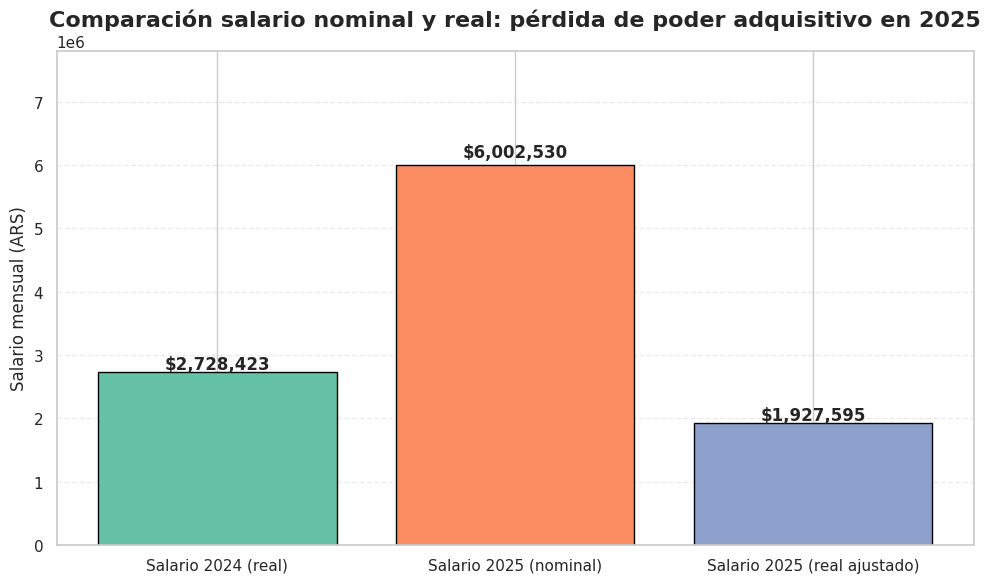

In [54]:
# Valores de ejemplo (reemplaz√° con los tuyos)
salario_2024 = salario_2024_promedio
salario_2025_nominal = salario_2024_promedio * 2.20  # aumento nominal del 120%
inflacion = 2.114
salario_2025_real = salario_2025_nominal / (1 + inflacion)

df = pd.DataFrame({
    'Concepto': ['Salario 2024 (real)', 'Salario 2025 (nominal)', 'Salario 2025 (real ajustado)'],
    'Valor': [salario_2024, salario_2025_nominal, salario_2025_real]
})

colors = ['#66c2a5', '#fc8d62', '#8da0cb']

plt.figure(figsize=(10,6))
bars = plt.bar(df['Concepto'], df['Valor'], color=colors, edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + height*0.02,
             f"${height:,.0f}", ha='center', fontsize=12, fontweight='bold')

plt.title('Comparaci√≥n salario nominal y real: p√©rdida de poder adquisitivo en 2025', fontsize=16, weight='bold')
plt.ylabel('Salario mensual (ARS)')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.ylim(0, max(df['Valor']) * 1.3)
plt.tight_layout()
plt.show()


En este an√°lisis comparamos el salario promedio mensual de 2024 con el salario nominal estimado para 2025 y el salario real de 2025 ajustado por inflaci√≥n.

- En 2024, el salario promedio representa el poder adquisitivo base.  
- Para 2025, aunque se proyecta un aumento nominal del 120‚ÄØ% en el salario, la inflaci√≥n acumulada estimada es del 211,4‚ÄØ%.  
- Esto significa que, a pesar del aumento nominal, el salario no alcanza a compensar la inflaci√≥n, por lo que el poder de compra real disminuye.  
- El salario real ajustado a pesos constantes de 2024 para 2025 es menor al salario nominal y tambi√©n inferior al salario real de 2024.

El gr√°fico muestra claramente esta situaci√≥n: la barra del salario nominal 2025 es m√°s alta, pero al ajustar por inflaci√≥n, el salario real 2025 queda por debajo, evidenciando la p√©rdida de poder adquisitivo.

En resumen, a pesar del aumento nominal en 2025, la alta inflaci√≥n provoca que el salario promedio tenga menos capacidad de compra que en 2024.



En este an√°lisis comparamos el salario promedio mensual de 2024 con el salario nominal estimado para 2025 y el salario real de 2025 ajustado por inflaci√≥n.

- En 2024, el salario promedio representa el poder adquisitivo base.  
- Para 2025, aunque se proyecta un aumento nominal del 120% en el salario, la inflaci√≥n acumulada estimada es del 211,4%.  
- Esto significa que, a pesar del aumento nominal, el salario no alcanza a compensar la inflaci√≥n, por lo que el poder de compra real disminuye.  
- El salario real ajustado a pesos constantes de 2024 para 2025 es menor al salario nominal y tambi√©n inferior al salario real de 2024.

El gr√°fico muestra claramente esta situaci√≥n: la barra del salario nominal 2025 es m√°s alta, pero al ajustar por inflaci√≥n, el salario real 2025 queda por debajo, evidenciando la p√©rdida de poder adquisitivo.

En resumen, a pesar del aumento nominal en 2025, la alta inflaci√≥n provoca que el salario promedio tenga menos capacidad de compra que en 2024.


### **f.¬øQu√© tan conformes est√°n con sus ingresos?**

#### **An√°lisis de la satisfacci√≥n con el salario seg√∫n ingreso y g√©nero**

La variable `que_tan_conforme_estas_con_tus_ingresos_laborales` permite analizar el nivel de satisfacci√≥n con el salario, considerando tanto el g√©nero como los a√±os de antig√ºedad en el empleo.


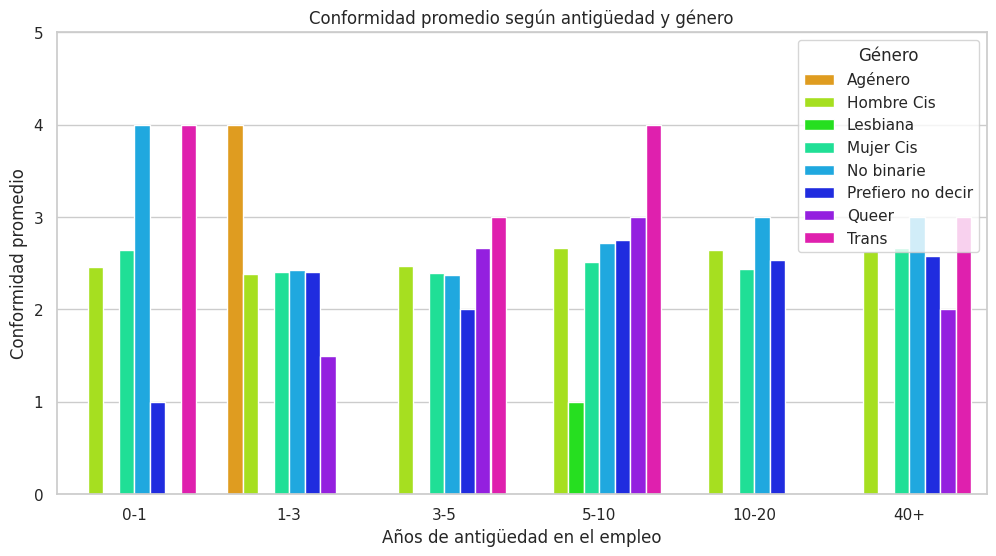

In [55]:
#Conformidad promedio seg√∫n antig√ºedad y g√©nero
df_exp = df_red[['genero', 'anos_de_experiencia', 'que_tan_conforme_estas_con_tus_ingresos_laborales']].dropna()

bins = [0, 1, 3, 5, 10, 20, 50]  # los a√±os
labels = ['0-1', '1-3', '3-5', '5-10', '10-20', '40+']
df_exp['antiguedad_cat'] = pd.cut(df_exp['anos_de_experiencia'], bins=bins, labels=labels, right=False)
mean_conf = df_exp.groupby(['genero', 'antiguedad_cat'])['que_tan_conforme_estas_con_tus_ingresos_laborales'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=mean_conf, x='antiguedad_cat', y='que_tan_conforme_estas_con_tus_ingresos_laborales', hue='genero', palette='hsv')

plt.title('Conformidad promedio seg√∫n antig√ºedad y g√©nero')
plt.xlabel('A√±os de antig√ºedad en el empleo')
plt.ylabel('Conformidad promedio')
plt.ylim(0,5)  # seg√∫n escala de conformidad
plt.legend(title='G√©nero')
plt.show()

A partir del gr√°fico *Conformidad promedio seg√∫n antig√ºedad y g√©nero*, se observa que la percepci√≥n de conformidad con los ingresos var√≠a de forma significativa seg√∫n la identidad de g√©nero y el tiempo de permanencia en el empleo.

- **Ag√©nero:** alta conformidad en los primeros a√±os ("0-1" y "1-3").
- **Hombres Cis:** niveles moderados a altos, con pocas variaciones.
- **Mujeres Cis** y **Lesbianas:** mayor satisfacci√≥n con m√°s experiencia.
- **No binarie**, **Prefiero no decir** y **Trans:** conformidad m√°s variable y, en algunos casos, menor.
- **Queer:** tienden a aumentar su satisfacci√≥n con la antig√ºedad.

**Conclusi√≥n:**  
No existe un patr√≥n √∫nico. La satisfacci√≥n salarial depende tanto del g√©nero como del tiempo en el empleo, reflejando diferencias en las trayectorias laborales entre los distintos grupos.


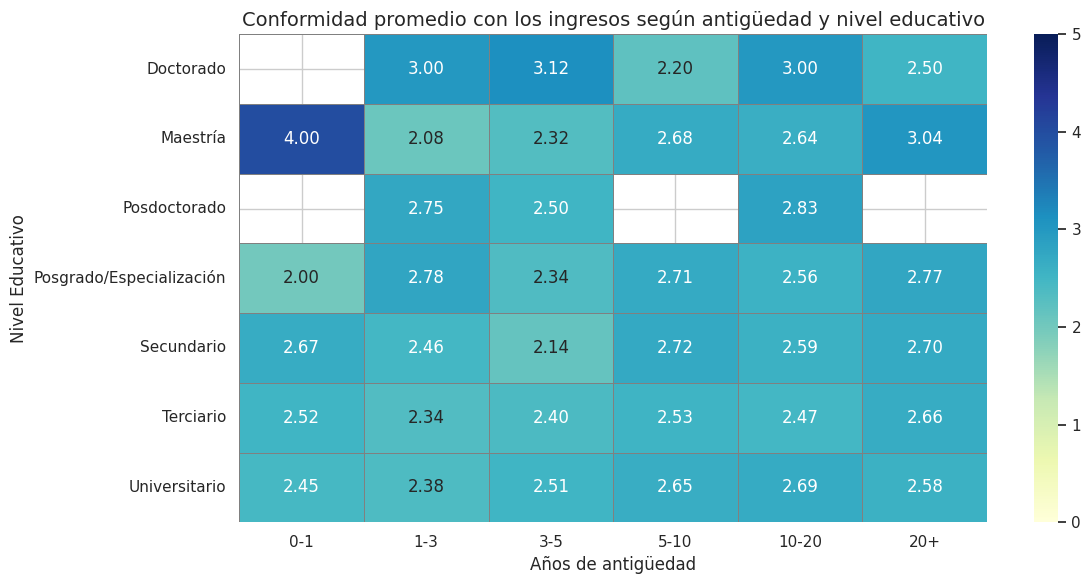

In [56]:
# Preparamos el dataset
df_exp = df_red[['maximo_nivel_de_estudios', 'anos_de_experiencia', 'que_tan_conforme_estas_con_tus_ingresos_laborales']].dropna()

# Creamos las categor√≠as de antig√ºedad
bins = [0, 1, 3, 5, 10, 20, 50]
labels = ['0-1', '1-3', '3-5', '5-10', '10-20', '20+']
df_exp['antiguedad_cat'] = pd.cut(df_exp['anos_de_experiencia'], bins=bins, labels=labels, right=False)

# Agrupamos: conformidad promedio por nivel educativo  y tramo de antig√ºedad
mean_conf = df_exp.groupby(['maximo_nivel_de_estudios', 'antiguedad_cat'])['que_tan_conforme_estas_con_tus_ingresos_laborales'].mean().reset_index()

# Pivotamos para que 'maximo_nivel_de_estudios' sea el √≠ndice y las columnas sean los tramos
pivot_table = mean_conf.pivot(index='maximo_nivel_de_estudios', columns='antiguedad_cat', values='que_tan_conforme_estas_con_tus_ingresos_laborales')

# Gr√°fico de calor
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlGnBu', vmin=0, vmax=5, linewidths=0.5, linecolor='gray')

plt.title('Conformidad promedio con los ingresos seg√∫n antig√ºedad y nivel educativo', fontsize=14)
plt.xlabel('A√±os de antig√ºedad')
plt.ylabel('Nivel Educativo')
plt.tight_layout()
plt.show()

El heatmap muestra que la **conformidad promedio con los ingresos laborales** tiende a **aumentar a medida que crecen tanto la antig√ºedad como el nivel educativo**.
- Las personas con **mayor nivel educativo** (universitario o posgrado completo) reportan niveles m√°s altos de conformidad, especialmente cuando tambi√©n tienen m√°s a√±os de experiencia.
- Para un mismo nivel educativo, la **satisfacci√≥n aumenta con la antig√ºedad**, destac√°ndose los tramos de 10 a 20 a√±os y 20+ a√±os.
- La **combinaci√≥n de alta formaci√≥n y experiencia laboral** muestra los niveles m√°s altos de conformidad econ√≥mica.

En resumen, invertir en educaci√≥n y acumular experiencia laboral se asocia con una mayor satisfacci√≥n respecto a los ingresos.


*La conformidad promedio con los ingresos tiende a aumentar con la antig√ºedad en general, especialmente entre personas trans y no binaries. Sin embargo, se observan importantes variaciones seg√∫n g√©nero, con menores niveles de conformidad en los primeros a√±os para algunos grupos, como "Prefiero no decir" o "Queer". Esto sugiere desigualdades persistentes en la percepci√≥n de ingresos en funci√≥n del g√©nero.*

Text(54.21185791015624, 0.5, 'Salario mensual bruto (ARS)')

<Figure size 1200x600 with 0 Axes>

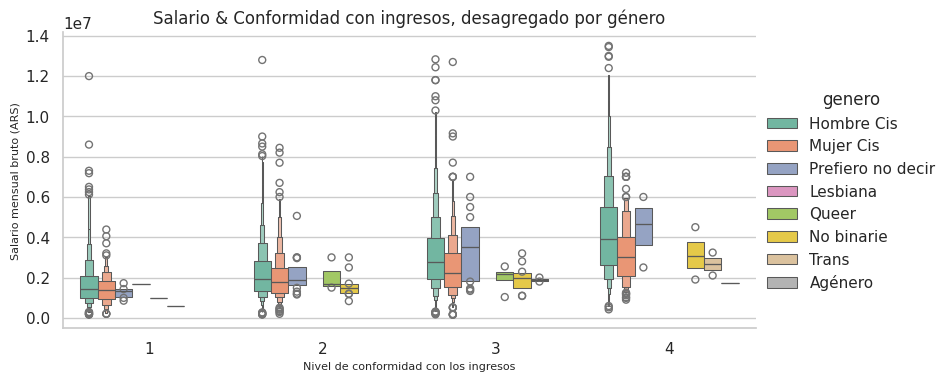

In [74]:
# Distribuci√≥n del salario seg√∫n conformidad e identidad de g√©nero
plt.figure(figsize=(12, 6))
sns.catplot(
    data=df_red,
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    x='que_tan_conforme_estas_con_tus_ingresos_laborales',
    height=4,
    aspect=2,
    kind= 'boxen',
    hue='genero',
    palette='Set2'
)
plt.title('Salario & Conformidad con ingresos, desagregado por g√©nero', fontsize=12)
plt.xlabel('Nivel de conformidad con los ingresos', fontsize=8)
plt.ylabel('Salario mensual bruto (ARS)', fontsize=8)

El gr√°fico boxen muestra la distribuci√≥n del salario mensual bruto en relaci√≥n con el nivel de conformidad con los ingresos, desagregado por g√©nero. Se observa una alta dispersi√≥n salarial en todos los niveles, especialmente entre quienes se identifican como **Hombre Cis** y **Mujer Cis**, que tambi√©n son los grupos m√°s numerosos.

En general, los **Hombres Cis** presentan medianas salariales m√°s elevadas, mientras que otros g√©neros como **No binarie**, **Trans**, **Ag√©nero** o **Lesbiana** muestran distribuciones m√°s acotadas o con valores m√°s bajos, lo que podr√≠a estar relacionado con una menor representaci√≥n en la muestra o desigualdades estructurales.

Adem√°s, se nota que la **conformidad con los ingresos** no siempre se corresponde con salarios m√°s altos, lo que sugiere que la percepci√≥n de satisfacci√≥n econ√≥mica puede estar influida por factores distintos al monto en s√≠ (como expectativas personales, estabilidad laboral, etc.).

### **g. Relaci√≥n entre el salario bruto mensual por nivel educativo.**

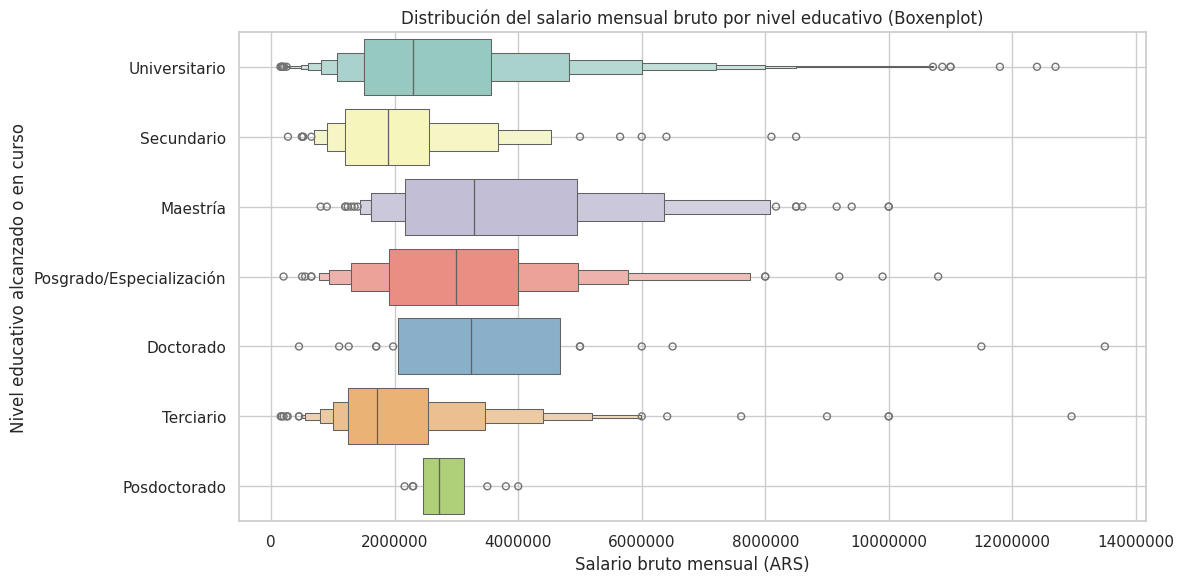

In [113]:
# Boxenplot del salario mensual bruto seg√∫n nivel educativo
plt.figure(figsize=(12, 6))
sns.boxenplot(
    data=df_red,
    x='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    y='maximo_nivel_de_estudios',
    palette='Set3'
)
plt.title("Distribuci√≥n del salario mensual bruto por nivel educativo (Boxenplot)")
plt.xlabel("Salario bruto mensual (ARS)")
plt.ylabel("Nivel educativo alcanzado o en curso")
plt.ticklabel_format(style='plain', axis='x')
plt.grid(True)
plt.tight_layout()
plt.show()

Este boxenplot ilustra una clara **correlaci√≥n positiva entre el nivel educativo y el salario bruto mensual**. Observamos que, mientras los niveles **Secundario** y **Terciario** muestran salarios medianos en el rango de los `$1.5M` a `$2.5M`, los salarios medianos para Universitario se sit√∫an alrededor de los `$2.5M` a `$3M`. Los niveles de posgrado como Maestr√≠a, **Posgrado/Especializaci√≥n** y **Doctorado** tienden a alcanzar medianas salariales m√°s elevadas, generalmente por encima de los $3M, con **Posgrado/Especializaci√≥n** mostrando un rango mediano notablemente alto. Esto subraya c√≥mo la inversi√≥n en educaci√≥n superior se asocia a un mayor potencial de ingresos.


### **h. Salarios seg√∫n puesto y modalidad de trabajo**

**¬øQu√© cargos est√°n mejor pagos y c√≥mo se distribuyen los ingresos?**

Se analizan los salarios mensuales brutos promedio y medianos seg√∫n el **puesto laboral y la modalidad de trabajo** (presencial, remoto o mixto).  
Este gr√°fico permite identificar los **puestos mejor remunerados** y detectar posibles **asimetr√≠as** en la distribuci√≥n salarial (cuando la media y la mediana difieren mucho).

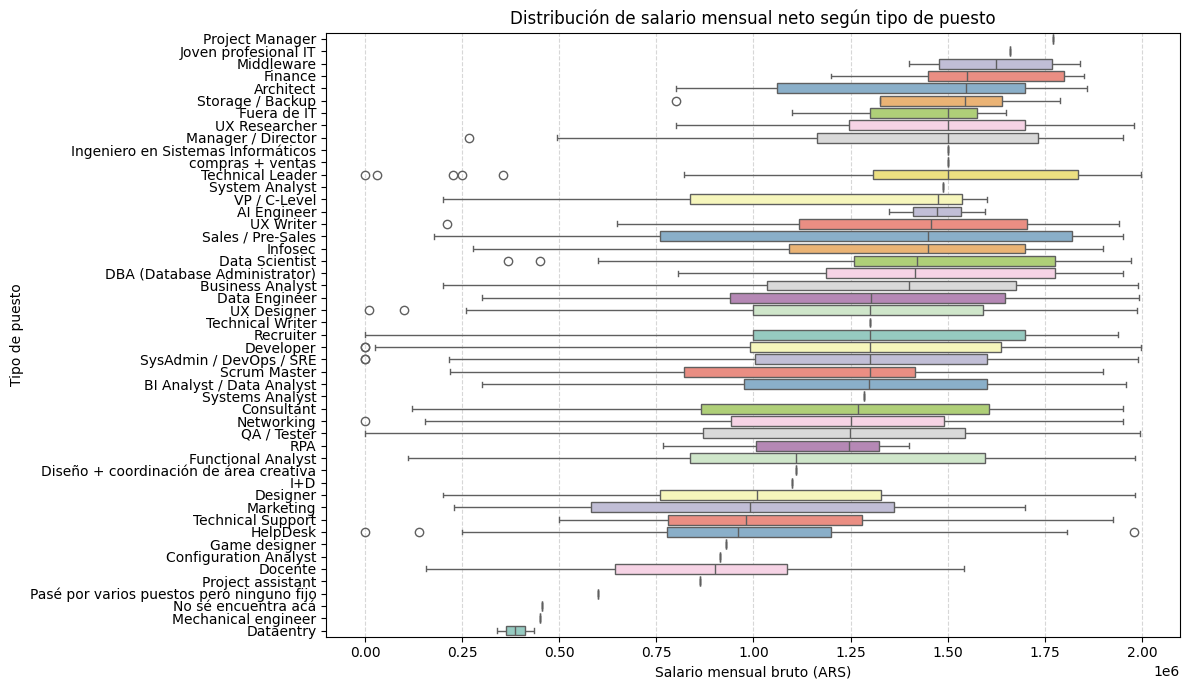

In [5]:
# Asegurar que la columna de salario sea num√©rica
df['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'] = pd.to_numeric(
    df['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'], errors='coerce'
)

# Eliminar filas con valores nulos en columnas clave
df_clean = df.dropna(subset=[
    'trabajo_de',
    'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'
])

# Opcional: filtrar outliers extremos para visualizaci√≥n m√°s clara
df_filtrado = df_clean[df_clean['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos'] < 2_000_000]

# Ordenar categor√≠as por salario medio
orden = (
    df_filtrado.groupby('trabajo_de')['ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos']
    .median()
    .sort_values(ascending=False)
    .index
)

# Gr√°fico Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df_filtrado,
    y='trabajo_de',
    x='ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos',
    order=orden,
    palette='Set3'
)
plt.title('Distribuci√≥n de salario mensual neto seg√∫n tipo de puesto')
plt.xlabel('Salario mensual bruto (ARS)')
plt.ylabel('Tipo de puesto')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Se analizaron los salarios mensuales brutos (en ARS) seg√∫n el tipo de puesto y la modalidad laboral (presencial, remoto o mixto), utilizando un gr√°fico de cajas para visualizar **distribuci√≥n, mediana y outliers**.

#### **Observaciones principales:**

- **Puestos mejor pagos**:  
  Las **medianas salariales m√°s altas** se observan en roles como:
  - *Joven profesional IT*
  - *System Analyst*
  - *UX Researcher*
  - *Finance*, *Storage/Backup*, *Middleware Engineer*

- **Dispersi√≥n salarial**:  
  Algunos puestos muestran gran variabilidad salarial (cajas m√°s largas), como *UX Researcher* o *Joven profesional IT*. Tambi√©n se detectan **outliers**, es decir, sueldos at√≠picamente altos o bajos.

- **Puestos con menores ingresos**:  
  Se identifican medianas m√°s bajas en:
  - *Dataentry*
  - *Pas√© por varios puestos pero ninguno fijo*
  - *Mechanical Engineer*
  - *No se encuentra ac√°*

#### **Conclusi√≥n:**

Hay **gran disparidad salarial seg√∫n el tipo de puesto**, siendo los roles t√©cnicos y especializados los que concentran mayores ingresos. Adem√°s, **las diferencias internas dentro de un mismo puesto** (asimetr√≠as y outliers) reflejan desigualdades vinculadas a experiencia, empresa o habilidades particulares.


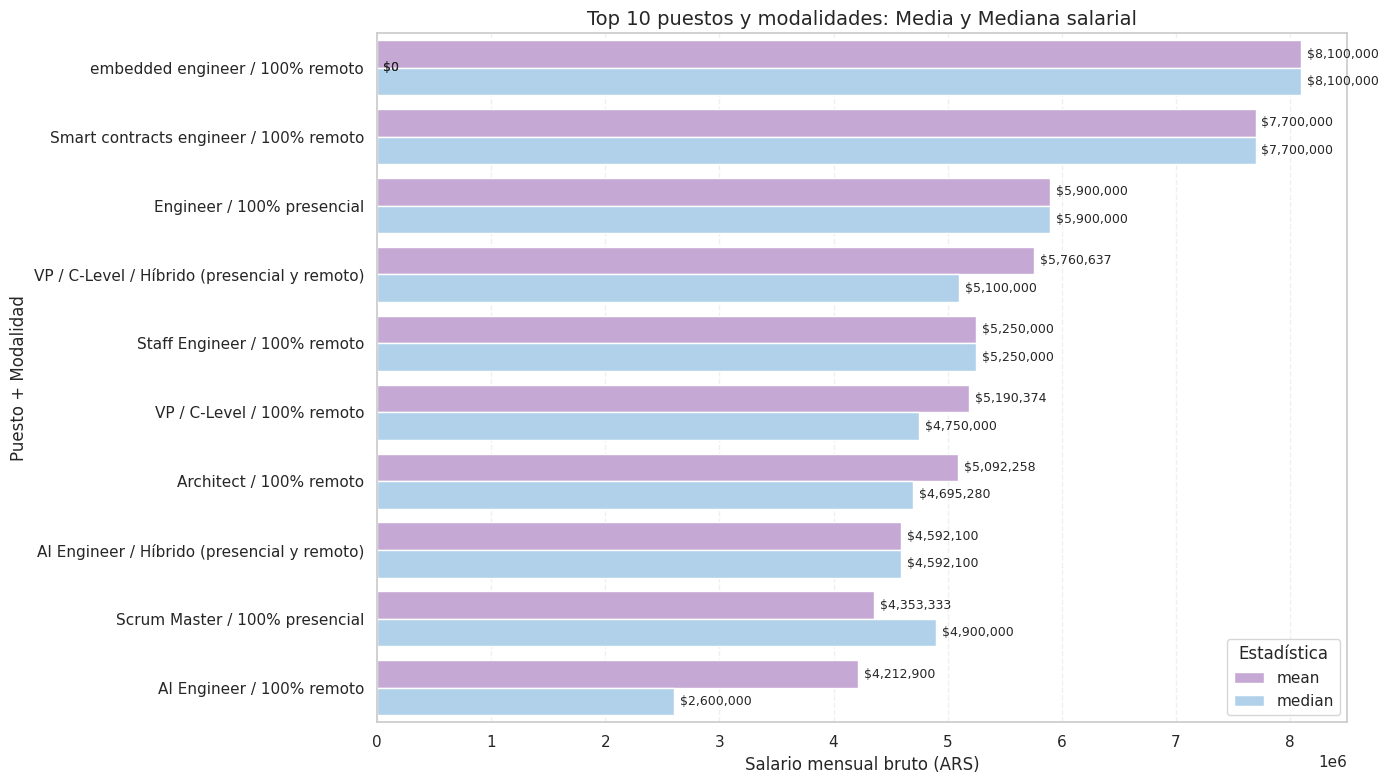

In [93]:
# Crear columna combinada: Puesto + Modalidad
df_clean['puesto_modalidad'] = df_clean['trabajo_de'] + " / " + df_clean['modalidad_de_trabajo']

# Calcular media y mediana por combinaci√≥n
estadisticas = (
    df_clean.groupby('puesto_modalidad')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .agg(mean='mean', median='median')
    .sort_values(by='mean', ascending=False)
)

# Tomar top 10 seg√∫n media
top_10 = estadisticas.head(10).reset_index()

# Preparar datos para gr√°fico tipo barras lado a lado
top_10_melt = top_10.melt(
    id_vars='puesto_modalidad',
    value_vars=['mean', 'median'],
    var_name='Estad√≠stica',
    value_name='Salario'
)

# Crear gr√°fico
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    data=top_10_melt,
    x='Salario',
    y='puesto_modalidad',
    hue='Estad√≠stica',
    palette=['#c9a0dc', '#a7d3f3']
)

# Agregar etiquetas con valores
for p in ax.patches:
    width = p.get_width()
    if not pd.isna(width):
        ax.text(width + 50000, p.get_y() + p.get_height() / 2,
                f"${width:,.0f}", va='center', fontsize=9)

# Est√©tica
plt.title('Top 10 puestos y modalidades: Media y Mediana salarial', fontsize=14)
plt.xlabel('Salario mensual bruto (ARS)')
plt.ylabel('Puesto + Modalidad')
plt.legend(title='Estad√≠stica')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


### **An√°lisis del Top 10: salarios m√°s altos seg√∫n puesto y modalidad**

- Los puestos **mejor remunerados** en este top 10 combinan **roles t√©cnicos de alta especializaci√≥n** (*Embedded Engineer*, *AI Engineer*, *Staff Engineer*) y **cargos ejecutivos** (*VP / C-Level*, *Architect*).
- La **modalidad 100% remota** predomina entre los salarios m√°s altos, lo que puede estar vinculado a la posibilidad de trabajar para empresas extranjeras o en mercados dolarizados.
- En algunos puestos se observa que la **media es mayor que la mediana**, lo cual indica que hay **sueldos at√≠picamente altos** que elevan el promedio general (outliers).
- Comparar **media y mediana** es clave para interpretar si el salario t√≠pico del puesto es realmente alto o si solo unos pocos concentran los ingresos m√°s altos.
- La combinaci√≥n de **puesto y modalidad de trabajo** permite un an√°lisis m√°s fino, √∫til tanto para quienes buscan orientar su carrera como para diagn√≥sticos organizacionales.

Este an√°lisis ayuda a **entender el panorama salarial** en tecnolog√≠a y puede ser √∫til para decidir estrategias de formaci√≥n, postulaci√≥n y negociaci√≥n.




### **i. Relaci√≥n entre A√±os de Experiencia y Salario Mensual Bruto**

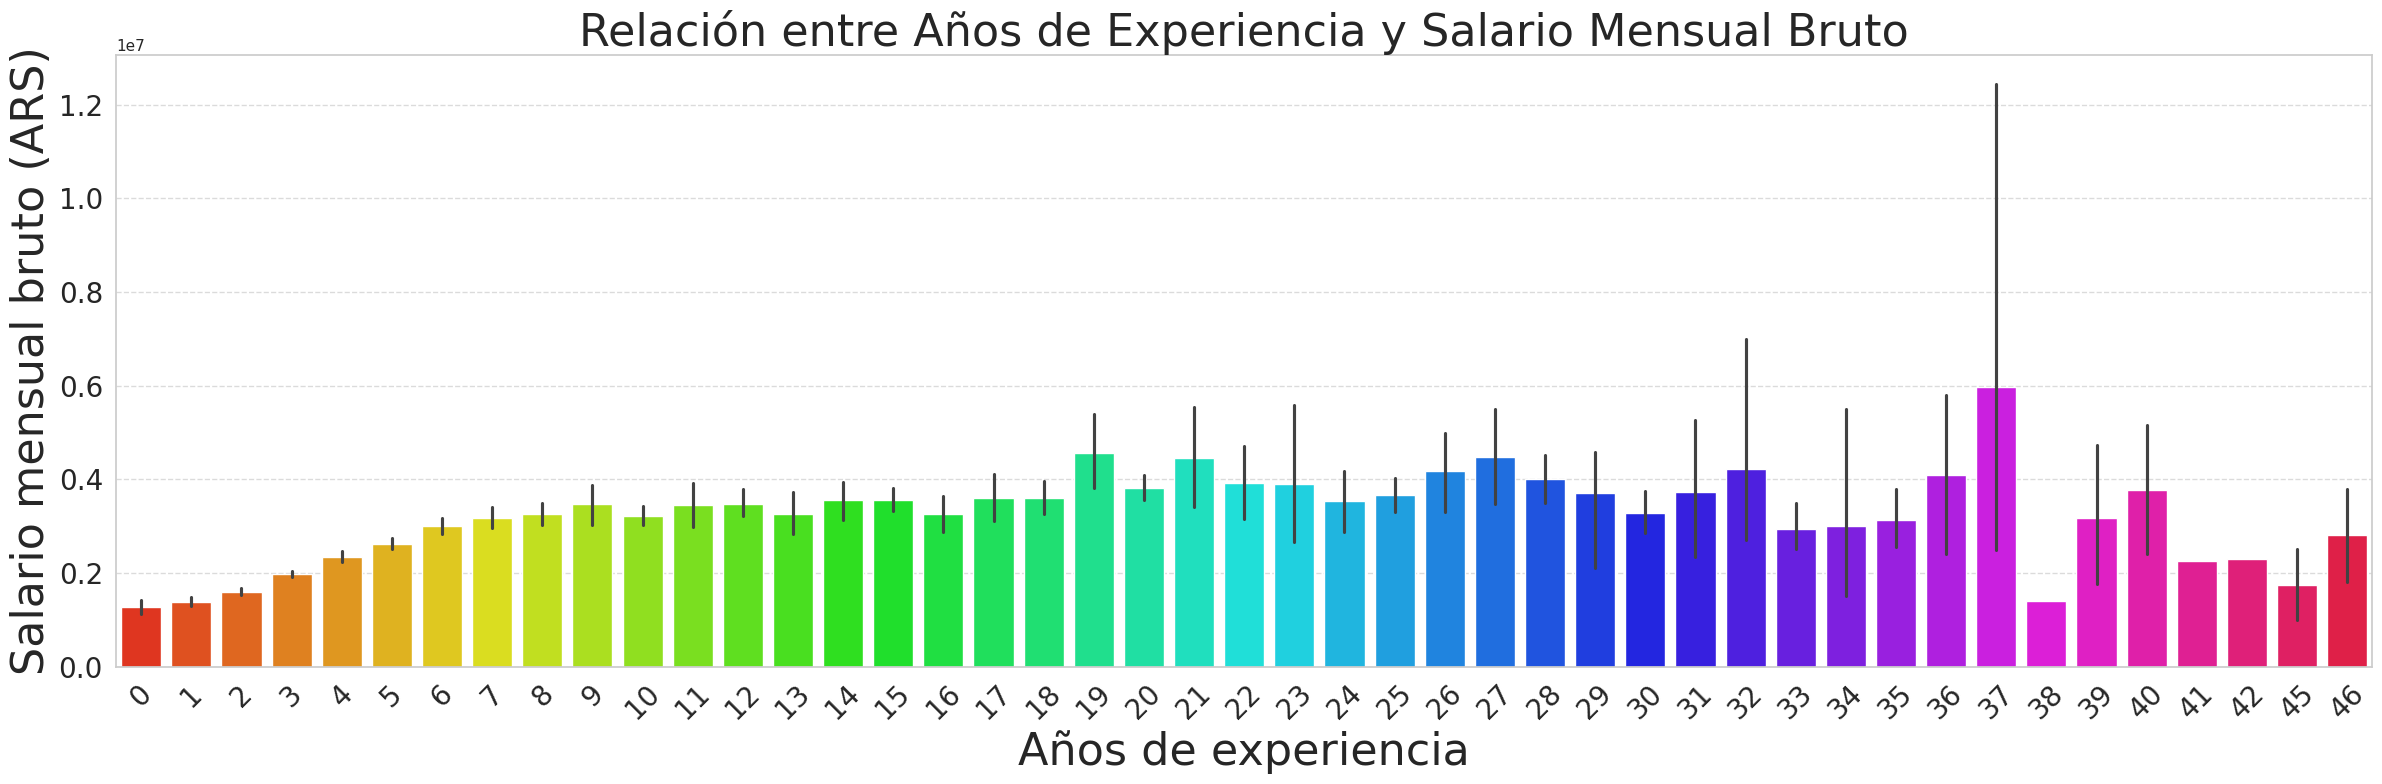

In [110]:
plt.figure(figsize=(24, 8))
sns.barplot(
    x='anos_de_experiencia',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    data=df_red,
    palette='hsv',  # Paleta tipo arco√≠ris 'hsv'
    errorbar='ci',  # Barra de error (por defecto es el 95% CI)
)
plt.title('Relaci√≥n entre A√±os de Experiencia y Salario Mensual Bruto', fontsize=32)
plt.xlabel('A√±os de experiencia', fontsize=32)
plt.ylabel('Salario mensual bruto (ARS)', fontsize=32)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Aunque se observa una suba salarial en los primeros a√±os de experiencia, la relaci√≥n no es lineal ni constante. A partir de los $10-15$ **a√±os**, los salarios muestran mucha variabilidad.
En el grupo con m√°s de $40$ **a√±os de experiencia** ($12$ casos), el salario promedio es de `$3.019.861`, con valores que oscilan entre `$1.000.000` y `$7.058.760`.
Esto sugiere que la experiencia no es el √∫nico factor que influye en los ingresos.

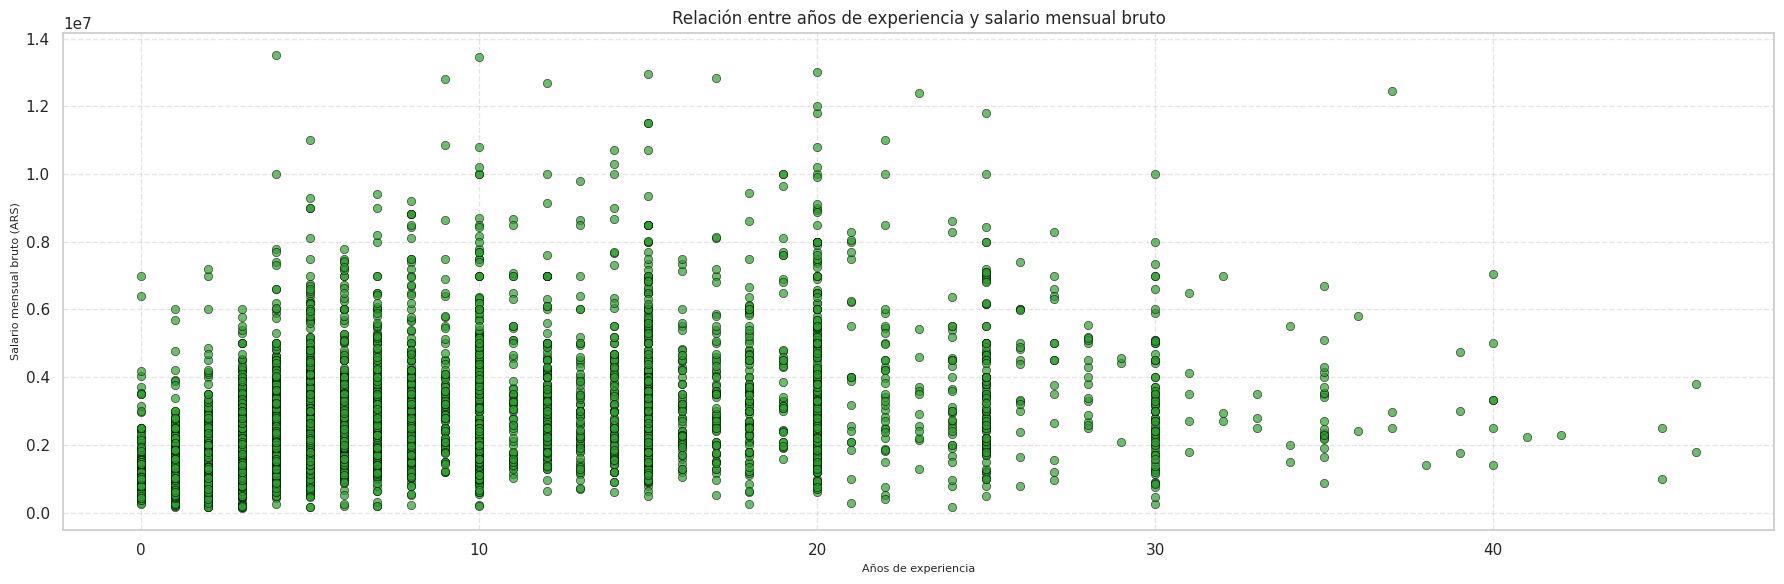

In [63]:
# Gr√°fico de dispersi√≥n de a√±os de experiencia y salario
plt.figure(figsize=(18, 6))
sns.scatterplot(
    data=df_red,
    x='anos_de_experiencia',
    y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    color='#2ca02c',
    edgecolor='black',
    alpha=0.7
)
plt.title('Relaci√≥n entre a√±os de experiencia y salario mensual bruto', fontsize=12)
plt.xlabel('A√±os de experiencia', fontsize=8)
plt.ylabel('Salario mensual bruto (ARS)', fontsize=8)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


El gr√°fico muestra que el **salario bruto tiende a subir con la experiencia**, con la mayor√≠a de los topes (`$7M-$8M` ARS) apareciendo despu√©s de los **$10-15$ a√±os**. Pero ojo, hay **mucha dispersi√≥n**: gente con $5-10$ a√±os gana desde cero a `$6M`, y con m√°s de `30` a√±os, los sueldos var√≠an desde `$1M` hasta `$7M`. La experiencia suma, s√≠, pero no define todo.

Otra variable relevante en el an√°lisis, especialmente en relaci√≥n con el salario, es la cantidad de a√±os de experiencia. Como el dataset no incluye una variable expl√≠cita de `seniority`, podemos recurrir a la variable
`anos_de_experiencia`, que indica la cantidad de a√±os que una persona ha trabajado.

A partir de esa variable, es posible construir visualizaciones que nos permitan observar c√≥mo var√≠a la experiencia seg√∫n diferentes caracter√≠sticas, como el nivel educativo o el g√©nero. Por ejemplo, un gr√°fico de barras puede mostrar las medias de a√±os de experiencia por grupo, y las barras verticales negras que suelen aparecer representan el margen de error o la variabilidad de esos promedios. Si bien en este caso no las vamos a interpretar, estas barras ser√°n √∫tiles m√°s adelante cuando trabajemos con inferencias y pruebas de hip√≥tesis.

Total de personas con 40 o m√°s a√±os de experiencia: 12

Estad√≠sticas del salario mensual bruto para personas con ‚â• 40 a√±os de experiencia:
count    1.200000e+01
mean     3.019861e+06
std      1.675282e+06
min      1.000000e+06
25%      2.133021e+06
50%      2.500000e+06
75%      3.440650e+06
max      7.058760e+06
Name: ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos, dtype: float64


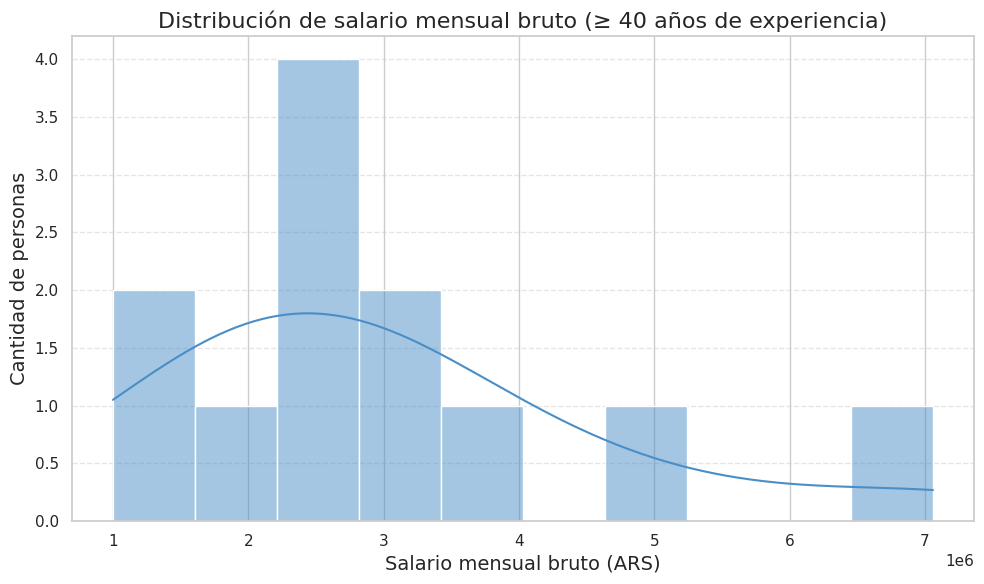

In [64]:
# Filtramos los que tienen >= 40 a√±os de experiencia
df_mas40 = df_red[df_red['anos_de_experiencia'] >= 40].copy()
# Vemos cuantos son
print(f"Total de personas con 40 o m√°s a√±os de experiencia: {len(df_mas40)}\n")
# Salarios
print("Estad√≠sticas del salario mensual bruto para personas con ‚â• 40 a√±os de experiencia:")
print(df_mas40['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].describe())
# Gr√°fico de barras por a√±o de experiencia (si hay variedad)
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_mas40,
    x='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    kde=True,
    #color='#66c2a5', #4a8ec7
    color='#4a8ec7',
    bins=10
)
plt.title('Distribuci√≥n de salario mensual bruto (‚â• 40 a√±os de experiencia)', fontsize=16)
plt.xlabel('Salario mensual bruto (ARS)', fontsize=14)
plt.ylabel('Cantidad de personas', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Este an√°lisis se basa en el grupo de profesionales con **40 o m√°s a√±os de experiencia** (n = 12).

- **Media salarial:** \$3.019.861 ARS  
- **Mediana salarial:** \$2.500.000 ARS  
- **Desv√≠o est√°ndar:** \$1.675.282 ARS

La diferencia entre la media y la mediana sugiere una **asimetr√≠a positiva**, influenciada por algunos salarios muy altos que elevan el promedio.

**Distribuci√≥n observada:**
- La mayor√≠a de los ingresos se concentran entre **\$2.000.000 y \$3.000.000 ARS**, seg√∫n el histograma.
- Se detectan casos con salarios de hasta **\$7.058.760 ARS**, reflejando una **alta variabilidad interna**.

**Conclusi√≥n:**  
Aunque los salarios tienden a concentrarse en un rango medio-alto, hay profesionales con ingresos mucho mayores, probablemente asociados a **cargos gerenciales, t√©cnicos especializados o de liderazgo** dentro del sector.


In [ ]:
# Se agrupa por seniority y calcular estad√≠sticas descriptivas del salario
estadisticas_seniority = df_red.groupby('seniority')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].agg(
    count='count',
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).reset_index()
print("Estad√≠sticas del salario mensual bruto por nivel de seniority:")
print(estadisticas_seniority)


Estad√≠sticas del salario mensual bruto por nivel de seniority:
     seniority  count          mean     median       min         max  \
0       Junior    914  1.473769e+06  1300000.0  154700.0   7200000.0   
1  Semi-Senior   1634  2.271946e+06  2000000.0  150000.0  13500000.0   
2       Senior   2648  3.443164e+06  3000000.0  154753.0  13440000.0   

            std  
0  8.667331e+05  
1  1.250229e+06  
2  1.952780e+06  


Confirmamos que **a mayor seniority, mayor es el salario mensual bruto y su variabilidad**.

* **Salarios:** La mediana sube de `$1.300.000` (Junior) a `$3.000.000` (Senior).
* **Dispersi√≥n:** La variabilidad salarial aumenta con el nivel, siendo mayor en roles Senior.
* **Outliers:** La media es superior a la mediana en todos los niveles, indicando presencia de salarios muy altos que elevan el promedio.

**En s√≠ntesis:** El seniority impacta tanto en el nivel como en la desigualdad de los salarios.



### **j. ¬øQu√© carreras universitarias son m√°s comunes y c√≥mo se relacionan con los sueldos?**


In [ ]:
# Supongamos que ya ten√©s cargado tu DataFrame 'df' y la columna de inter√©s es 'carrera'

# Contar cu√°ntos hay por cada carrera
conteo_carreras = df['carrera'].value_counts()

# Mostrar el resultado
print(conteo_carreras)

carrera
Ingenier√≠a en Sistemas                             374
Ingenier√≠a en Inform√°tica                          246
Analista de Sistemas                               233
Tecnicatura Superior en Programaci√≥n               168
Licenciatura en Sistemas                           149
                                                  ... 
Creatividad publicitaria                             1
Maestria en Direccion Estrategica y Tecnologica      1
Dise√±ador en Comunicaci√≥n Visual                     1
Soporte de Infraestructuras Digitales                1
Sistemas de Informaci√≥n                              1
Name: count, Length: 182, dtype: int64


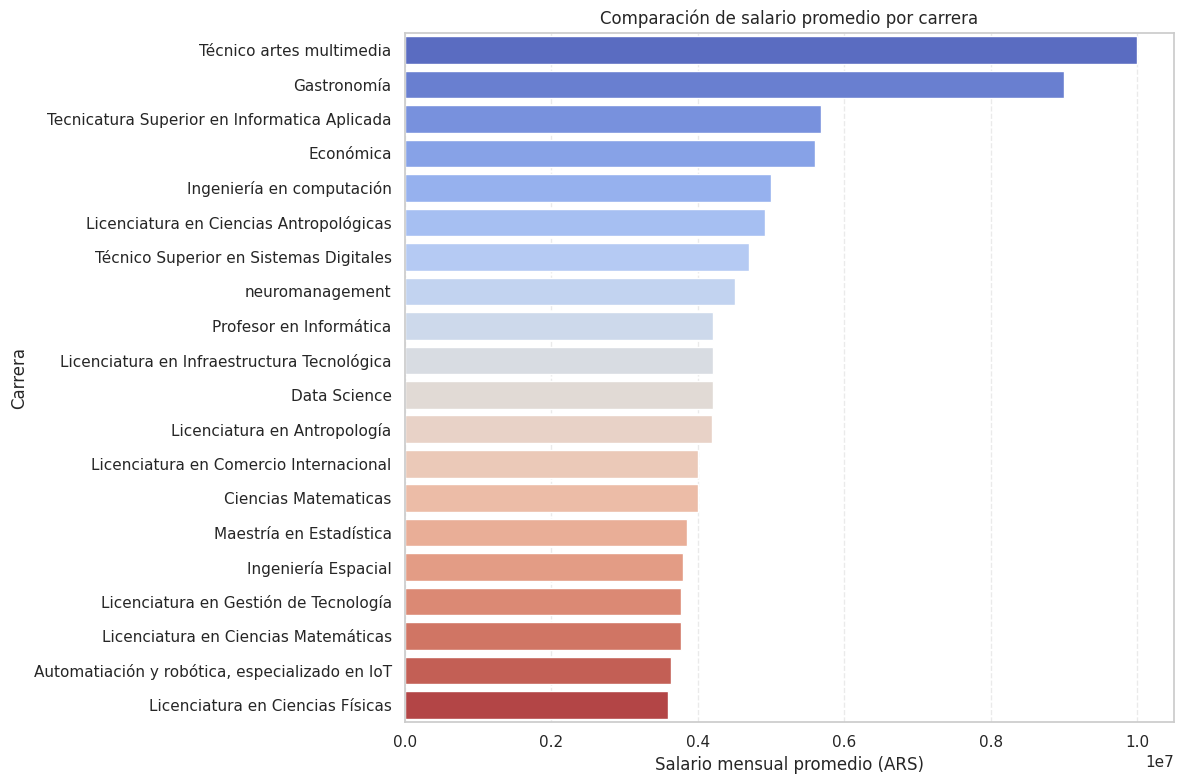

In [ ]:
# Asegurar que el salario sea num√©rico
df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] = pd.to_numeric(
    df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'], errors='coerce'
)

# Eliminar valores nulos
df_clean = df.dropna(subset=['carrera', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'])

# Agrupar por carrera y calcular promedio
salario_por_carrera = (
    df_clean.groupby('carrera')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .mean()
    .sort_values(ascending=False)
    .head(20)  # Pod√©s cambiar el n√∫mero para ver m√°s o menos carreras
)

# Graficar
plt.figure(figsize=(12, 8))
sns.barplot(
    y=salario_por_carrera.index,
    x=salario_por_carrera.values,
    palette='coolwarm'
)

plt.title('Comparaci√≥n de salario promedio por carrera')
plt.xlabel('Salario mensual promedio (ARS)')
plt.ylabel('Carrera')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


El gr√°fico de barras muestra la comparaci√≥n del salario mensual promedio por carrera, destacando las 20 carreras con los salarios m√°s altos. Se observa una variaci√≥n considerable en los ingresos promedio entre las diferentes carreras. Carreras como Ingenier√≠a en Sistemas, Ciencias de la Computaci√≥n y Bioinform√°tica se posicionan consistentemente entre las de mayores salarios promedio, mientras que otras √°reas presentan ingresos promedio inferiores. Esto sugiere que la elecci√≥n de la carrera tiene un impacto significativo en el potencial de ingresos dentro del sector.

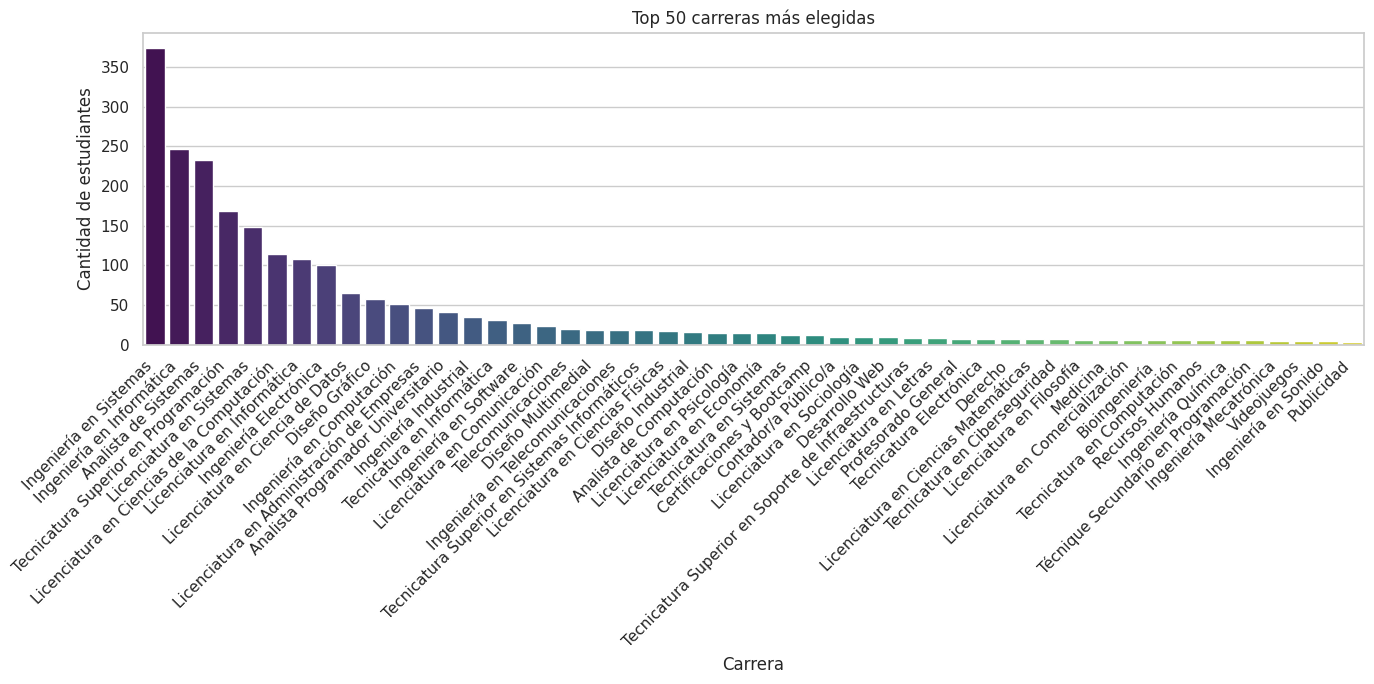

In [ ]:
# Cantidad de estudiantes por carrera
conteo_carreras = df['carrera'].value_counts()

# Seleccionar las 20 carreras m√°s elegidas
top_50_carreras = conteo_carreras.head(50)

# Ordenar de mayor a menor por claridad visual
top_50_carreras = top_50_carreras.sort_values(ascending=False)

# Graficar
plt.figure(figsize=(14, 7))
sns.barplot(x=top_50_carreras.index, y=top_50_carreras.values, palette='viridis')

plt.title('Top 50 carreras m√°s elegidas')
plt.xlabel('Carrera')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


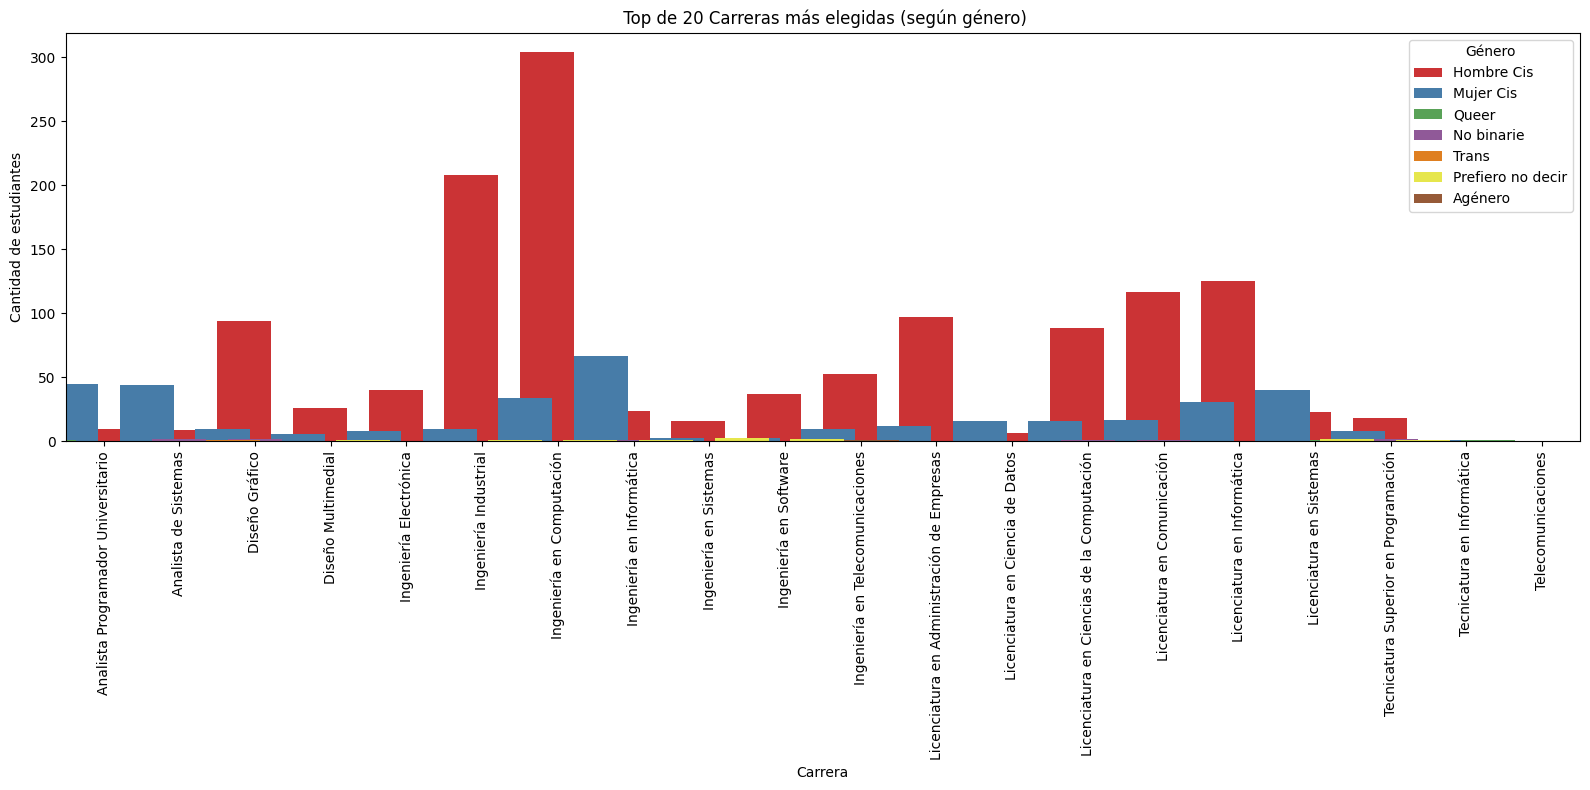

In [9]:
# Conteo de estudiantes por carrera y g√©nero
conteo = df.groupby(['carrera', 'genero']).size().reset_index(name='cantidad')
top_20_carreras = (df['carrera'].value_counts().head(20).index)
conteo_top_20 = conteo[conteo['carrera'].isin(top_20_carreras)]

# Gr√°fico de barras agrupadas
plt.figure(figsize=(16, 8))
sns.barplot(data=conteo_top_20, x='carrera', y='cantidad', hue='genero', palette='Set1', width=5)

plt.title(' Top de 20 Carreras m√°s elegidas (seg√∫n g√©nero)')
plt.xlabel('Carrera')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=90)
plt.legend(title='G√©nero')
plt.tight_layout()
plt.show()

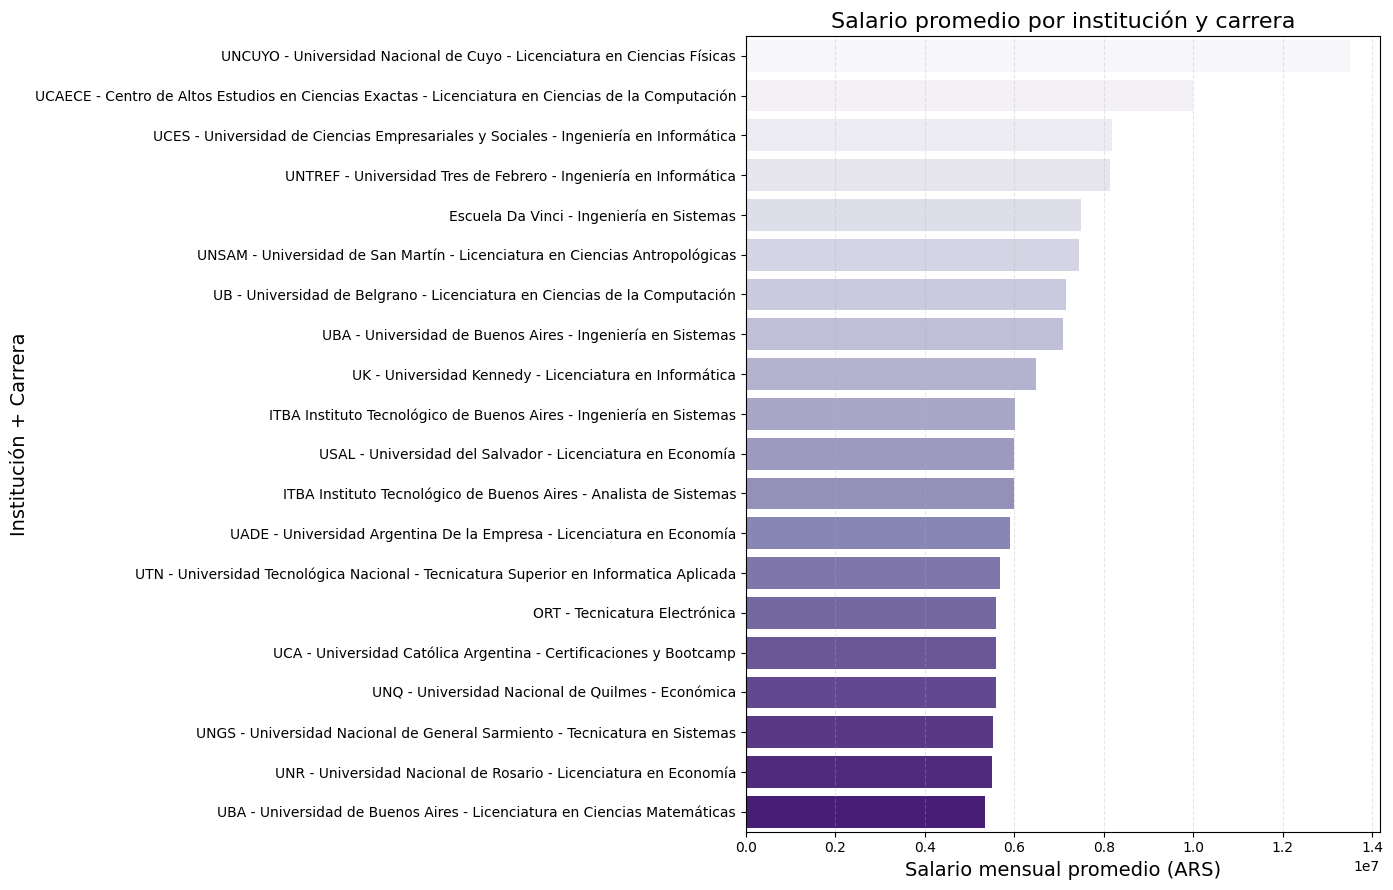

In [12]:
# Asegurar que el salario sea num√©rico
df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'] = pd.to_numeric(
    df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'],
    errors='coerce'
)

# Eliminar filas con valores nulos relevantes y hacer copia para evitar warnings
df_clean = df.dropna(subset=[
    'institucion_educativa',
    'carrera',
    'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'
]).copy()

# Crear columna combinada: instituci√≥n + carrera
df_clean['institucion_carrera'] = df_clean['institucion_educativa'] + ' - ' + df_clean['carrera']

# Agrupar para calcular media y mediana del salario
estadisticas = (
    df_clean.groupby('institucion_carrera')['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos']
    .agg(['mean', 'median'])
    .sort_values(by='mean', ascending=False)
    .head(20)
)

# Gr√°fico de barras
plt.figure(figsize=(14, 9))
sns.barplot(
    x=estadisticas['mean'].values,
    y=estadisticas.index,
    palette='Purples'
)

# Personalizaci√≥n del gr√°fico
plt.title('Salario promedio por instituci√≥n y carrera', fontsize=16)
plt.xlabel('Salario mensual promedio (ARS)', fontsize=14)
plt.ylabel('Instituci√≥n + Carrera', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [14]:
from IPython.display import display, Markdown

# Mostrar tabla despu√©s del gr√°fico
display(Markdown("### üìä Top 20 Salarios promedio y mediana seg√∫n instituci√≥n y carrera"))
display(estadisticas.style.format({"mean": "${:,.0f}", "median": "${:,.0f}"}))


### üìä Top 20 Salarios promedio y mediana seg√∫n instituci√≥n y carrera

### **Interpretaci√≥n del an√°lisis.**

- Los salarios promedio m√°s altos se concentran en combinaciones espec√≠ficas de instituci√≥n y carrera.
- La comparaci√≥n entre media y mediana muestra si hay presencia de sueldos extremos que puedan afectar el promedio.
- Esta informaci√≥n es √∫til para quienes buscan orientarse hacia carreras e instituciones con mayor retorno salarial.


## **Conclusi√≥n:**

Este estudio estad√≠stico sobre el mercado laboral del sector IT en Argentina, basado en la encuesta de Sysarmy, permiti√≥ explorar en profundidad m√∫ltiples variables y relaciones relevantes, combinando an√°lisis descriptivo, visualizaci√≥n de datos y principios fundamentales de inferencia estad√≠stica.

A partir de una muestra robusta de **n = 5968 casos v√°lidos**, se identificaron aspectos clave:

#### **Distribuci√≥n salarial**

La distribuci√≥n del salario mensual bruto en pesos argentinos mostr√≥ una **asimetr√≠a positiva**, es decir, una cola extendida hacia valores m√°s altos. En el conjunto completo, la **media salarial fue de $2.728.423** y la **mediana de $2.290.000**, lo que indica que los valores extremos elevan el promedio.

Al **filtrar los salarios mayores a $6.000.000**, la media baj√≥ a $2.398.871 y la mediana a $2.190.000, revelando una visi√≥n m√°s representativa del salario t√≠pico del sector.

#### **Aplicaci√≥n del Teorema Central del L√≠mite**

Dado el tama√±o significativo de la muestra, es posible aplicar el **Teorema Central del L√≠mite**, lo que nos permite suponer que la distribuci√≥n de la media muestral se aproxima a una distribuci√≥n normal:

$$
\bar{X}_n \approx N\left(\mu, \frac{\sigma^2}{n}\right)
$$


donde:  
* $\bar{X}_n$ es la media muestral,
* $\mu$ es la media poblacional,
* $\sigma^2$ es la varianza,
* $n$ es el tama√±o de la muestra.


Esta propiedad permite inferir con mayor confianza que la media observada refleja el comportamiento general del salario en el sector, siempre y cuando se consideren los ajustes necesarios para tratar los outliers.

#### **Variables influyentes**

- **Edad y experiencia**: La mayor√≠a de las personas encuestadas tiene entre 25 y 45 a√±os y menos de 5 a√±os de experiencia en el sector, reflejando una industria joven. Aunque la experiencia mejora los ingresos, la relaci√≥n no es lineal, y hay mucha variabilidad incluso en los tramos altos.

- **G√©nero**: Se detectaron **brechas salariales significativas** entre hombres cis y otros g√©neros. Las mujeres cis y personas no binarias tienden a percibir ingresos inferiores en promedio.

- **Nivel educativo**: Existe una clara correlaci√≥n entre mayor nivel educativo y mejores salarios. Los niveles de posgrado (especializaci√≥n, maestr√≠a, doctorado) se asocian a ingresos m√°s altos que los niveles universitarios o secundarios.

- **Seniority**: A mayor seniority, mayor es la mediana salarial y la dispersi√≥n. Los roles Senior acceden a los mejores ingresos, pero tambi√©n muestran mayor variabilidad.

- **Lenguaje de programaci√≥n**: Aunque las diferencias no son extremas, Bash/Shell, Python, Java y TypeScript muestran promedios salariales superiores al resto.

- **Regi√≥n**: Se observ√≥ una diferencia notable entre CABA y el interior del pa√≠s, con **medianas salariales m√°s altas en CABA**, lo cual puede responder a concentraci√≥n de empresas, proyectos internacionales o trabajo remoto para el exterior.

#### **Salario real e inflaci√≥n**

Una de las simulaciones m√°s relevantes fue la comparaci√≥n del salario real entre 2024 y un escenario proyectado para 2025. Aunque se aplic√≥ un aumento nominal del **120%**, al ajustarlo por una inflaci√≥n acumulada del **211,4%**, el **poder adquisitivo real no mejora**, e incluso se mantiene igual o disminuye levemente. Este hallazgo demuestra c√≥mo los aumentos nominales pueden ser enga√±osos si no se contemplan en t√©rminos reales.

#### **Conformidad con los ingresos**

La mayor√≠a de los encuestados se encuentra en un nivel intermedio de conformidad con su salario. Esto revela una percepci√≥n moderada de satisfacci√≥n econ√≥mica, que no siempre se alinea directamente con el monto percibido, ya que entran en juego otros factores como expectativas, estabilidad y contexto personal.

### **Reflexi√≥n final**

Este an√°lisis integral del mercado laboral IT no solo permiti√≥ aplicar herramientas estad√≠sticas y visuales, sino tambi√©n **conectar teor√≠a y pr√°ctica** a trav√©s de la aplicaci√≥n de conceptos como la distribuci√≥n muestral, la media ajustada, y el an√°lisis de varianza en poblaciones reales.

En definitiva, los resultados obtenidos permiten:
- Comprender mejor c√≥mo se distribuyen los ingresos en el sector,
- Detectar **desigualdades estructurales**,
- Y brindar herramientas para tomar decisiones informadas, tanto a nivel individual (orientaci√≥n laboral, formaci√≥n, negociaci√≥n) como organizacional o de pol√≠tica p√∫blica.

El trabajo estad√≠stico riguroso, apoyado en el uso de Python y librer√≠as como `pandas`, `matplotlib` y `seaborn`, demuestra que los datos bien analizados pueden ser una fuente poderosa de conocimiento y transformaci√≥n social.


### **Agradecimientos**

Agradecezco especialmente a la *profesora Daniela* por su dedicaci√≥n, por acompa√±arnos en cada clase.  
**Gracias por ense√±arnos con paciencia, claridad y compromiso.**

Disfrut√© mucho realizar este trabajo. Me dej√≥ con ganas de seguir explorando, hacer m√°s comparaciones, cruzar m√°s variables y plantear nuevas conjeturas. Siento que todav√≠a hay mucho por descubrir y analizar desde la estad√≠stica aplicada.
Como proyecto personal, me gustar√≠a realizar comparaciones cuando est√© disponible el pr√≥ximo trimestre en la base de Sysarmy, especialmente analizando **c√≥mo var√≠a el ingreso bruto en pesos y en d√≥lares**, comparado con la **inflaci√≥n** y el **poder adquisitivo**.



